In [2]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# DataFrame boyutlarını kontrol etme
num_rows, num_columns = df.shape
print(f"Veri, {num_rows} satır ve {num_columns} sütundan oluşuyor.")

# Sütun başlıklarını yazdırma
column_names = df.columns.tolist()
print("Sütun başlıkları:")
print(column_names)


Veri, 8309 satır ve 10 sütundan oluşuyor.
Sütun başlıkları:
['Register Date', 'Suspended Date', 'Seller ID', 'Registration Source', 'Total Account Count', 'Total Product Count', 'Total Income', 'Total Profit', 'Status', 'Cancellation Reason']


Register Date: Satıcının kayıt tarihi. Bu tarih, satıcının platforma ne zaman kaydolduğunu gösterir.

Suspended Date: Eğer satıcının hesabı askıya alındıysa, bu tarih, hesabın askıya alındığı tarihi gösterir. Askıya alma genellikle kurallara uymama veya diğer ihlaller nedeniyle olabilir.

Seller ID: Satıcının benzersiz kimliği veya numarası. Her satıcının platformdaki tanımlayıcı bir numarası bulunur.

Registration Source: Satıcının kaydolurken kullandığı kaynak. Örneğin, bu kaynak doğrudan platform üzerinden mi kayıt oldu, yoksa farklı bir yöntem mi kullandı gibi bilgileri içerebilir.

Total Account Count: Satıcının toplam hesap sayısı. Bu, satıcının farklı hesaplar altında platformda kaç tane hesabının olduğunu gösterir.

Total Product Count: Satıcının toplam ürün sayısı. Bu, satıcının platformda ne kadar çok ürün sattığını veya listelediğini gösterir.

Total Income: Satıcının toplam geliri. Bu sütun, satıcının platform üzerinden elde ettiği toplam gelir miktarını gösterir.

Total Profit: Satıcının toplam karı. Toplam gelir ile masraflar düşüldüğünde elde edilen kar miktarını ifade eder.

Status: Satıcının durumu. Bu, hesabın aktif mi, askıya alınmış mı, yoksa başka bir durumda mı olduğunu belirtir.

Cancellation Reason: Eğer hesap iptal edildiyse veya askıya alındıysa, iptal veya askıya alma nedenini açıklayan bir alan. Örneğin, kurallara uymama, sahtekarlık veya diğer nedenler bu alanda yer alabilir.

In [4]:
import pandas as pd
from datetime import datetime

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Aktif kalma süresi hesaplaması
current_date = datetime.today().date()

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
df['Suspended Date'].fillna(pd.Timestamp(current_date), inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Sonuçları göster
print(df[['Seller ID', 'Register Date', 'Suspended Date', 'Active Duration']])


        Seller ID Register Date Suspended Date  Active Duration
0     Seller 6851    2023-03-14     2023-08-22              161
1     Seller 4879    2022-10-04     2022-11-20               47
2     Seller 7245    2023-04-04     2023-08-22              140
3     Seller 4953    2022-10-12     2023-06-07              238
4     Seller 5047    2022-10-21     2022-11-20               30
...           ...           ...            ...              ...
8304  Seller 4816    2022-09-25     2023-08-22              331
8305  Seller 4817    2022-09-26     2022-11-25               60
8306  Seller 4819    2022-09-26     2023-08-22              330
8307  Seller 4852    2022-10-01     2022-10-15               14
8308  Seller 5156    2022-10-30     2023-08-22              296

[8309 rows x 4 columns]


In [90]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Status sütunundaki değerlere göre gruplama ve sayıları hesaplama
status_counts = df['Status'].value_counts()

# Farklı değerleri ve sayılarını gösterme
print("Status Counts:")
for value, count in status_counts.items():
    print(f"{value}: {count}")


Status Counts:
Suspended: 5940
Active: 2349
Not Verified: 18
Incomplete: 2


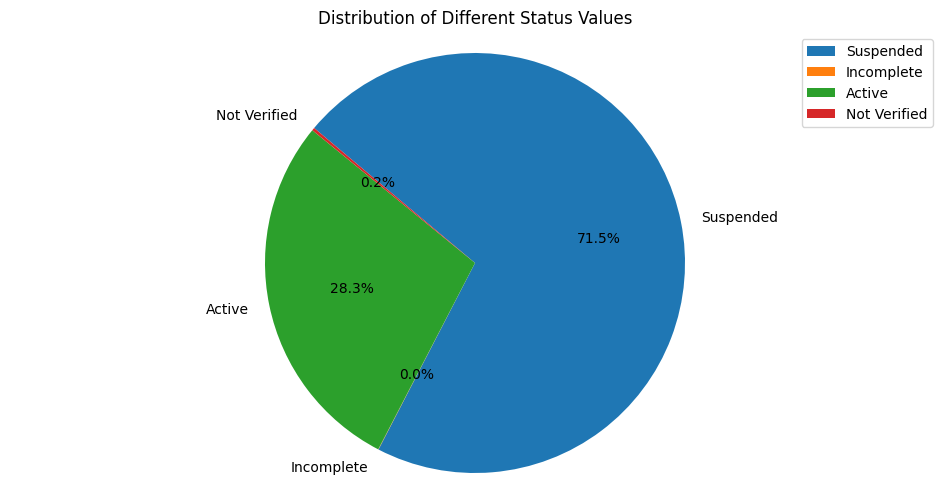

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Status sütunundaki değerlere göre gruplama ve sayıları hesaplama
status_counts = df['Status'].value_counts()

# Pasta grafiği çizme
plt.figure(figsize=(12, 6))

# En yüksek ve en düşük yüzdelere sahip dilimleri ayıralım
max_percent_status = status_counts.idxmax()
min_percent_status = status_counts.idxmin()

# Diğer durumları alalım
other_statuses = status_counts.drop([max_percent_status, min_percent_status])

# Sıralama
sorted_statuses = [max_percent_status, min_percent_status] + other_statuses.index.tolist()
sorted_counts = [status_counts[status] for status in sorted_statuses]

plt.pie(sorted_counts, labels=sorted_statuses, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.axis('equal')  # Daireyi çember şeklinde gösterme
plt.title('Distribution of Different Status Values')

plt.legend(sorted_statuses, loc='best')
plt.show()


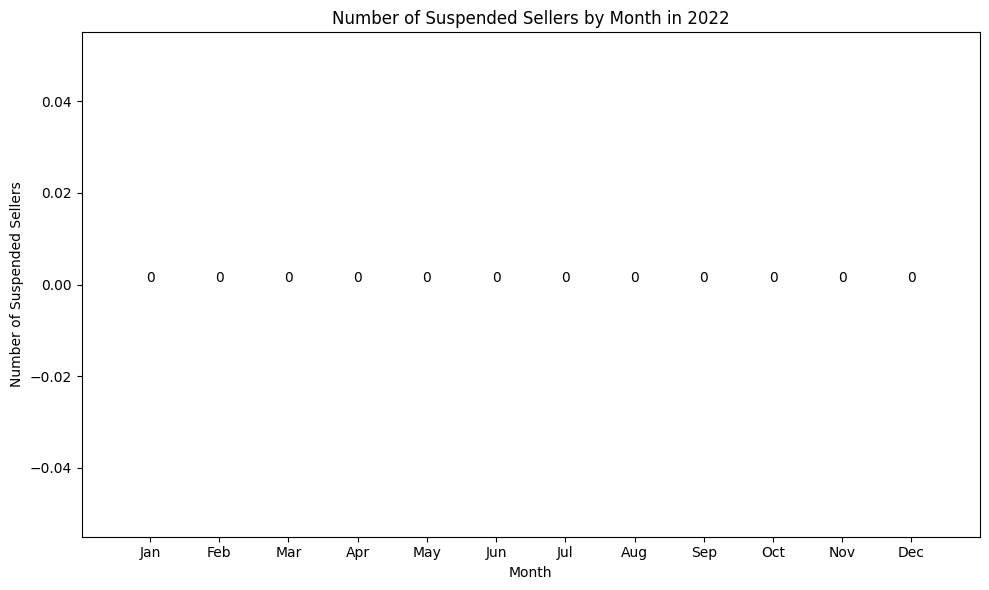

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime formatına dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Yıl ve ay sütunlarını oluşturma
df['Year'] = df['Register Date'].dt.year
df['Month'] = df['Register Date'].dt.month

# Sadece 2022 yılı verilerini seçme
df_2022 = df[df['Year'] == 2022]

# Aylara göre suspend sayılarını hesaplama
monthly_suspend_counts = df_2022.groupby('Month')['Seller ID'].apply(lambda x: (x == 'Suspended').sum())

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_suspend_counts.index, monthly_suspend_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Suspended Sellers')
plt.title('Number of Suspended Sellers by Month in 2022')
plt.xticks(monthly_suspend_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [4]:
suspended_date_count = df['Suspended Date'].count()
print("Number of entries in 'Suspended Date' column:", suspended_date_count)


Number of entries in 'Suspended Date' column: 5939


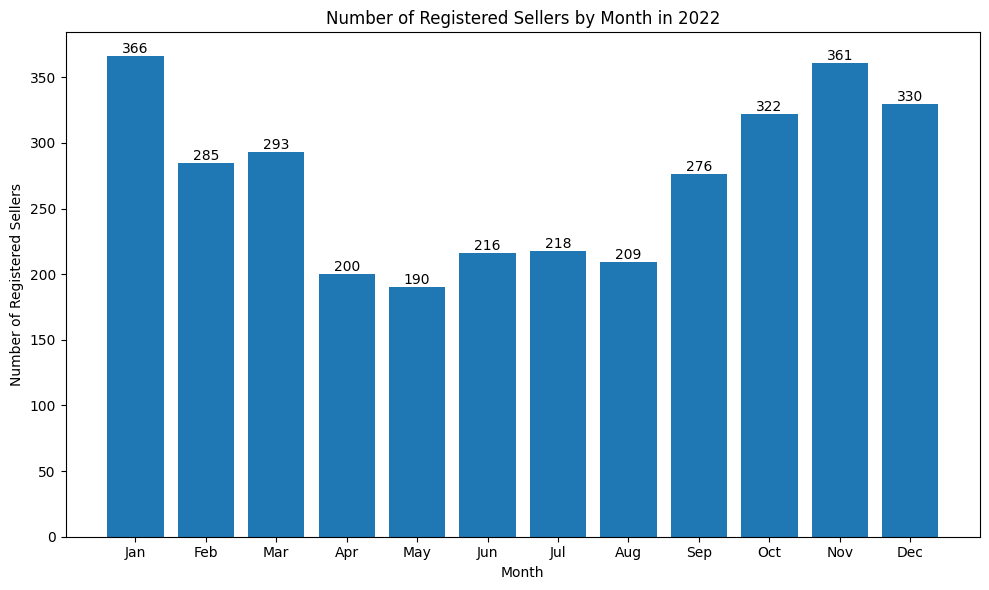

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2022 yılına ait verileri seçme
df_2022 = df[df['Register Date'].dt.year == 2022]

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2022.groupby(df_2022['Register Date'].dt.month)['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_registered_counts.index, monthly_registered_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Registered Sellers')
plt.title('Number of Registered Sellers by Month in 2022')
plt.xticks(monthly_registered_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


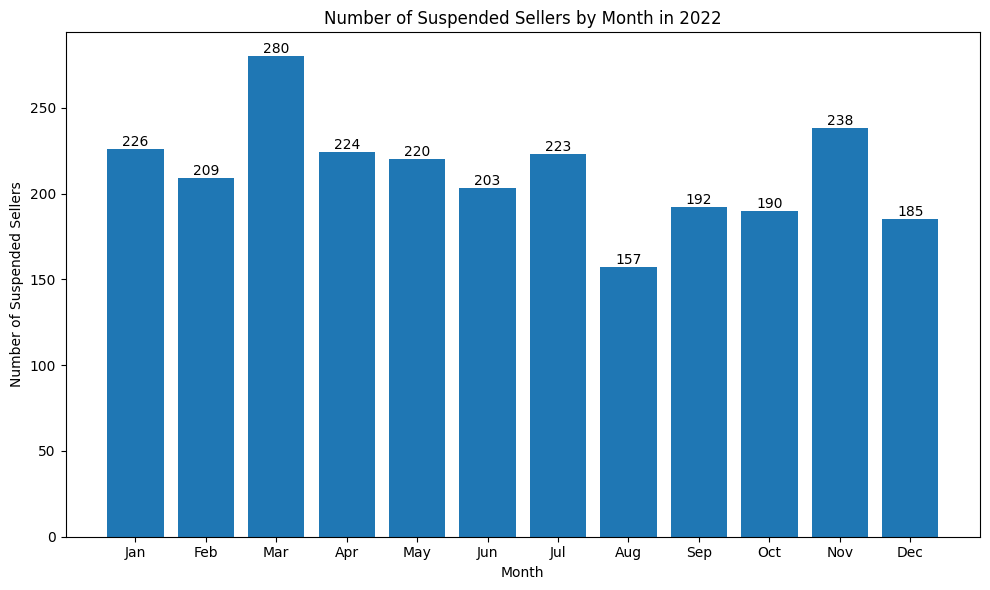

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# 2022 yılına ait verileri seçme
df_2022 = df[df['Suspended Date'].dt.year == 2022]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2022.groupby(df_2022['Suspended Date'].dt.month)['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_suspended_counts.index, monthly_suspended_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Suspended Sellers')
plt.title('Number of Suspended Sellers by Month in 2022')
plt.xticks(monthly_suspended_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


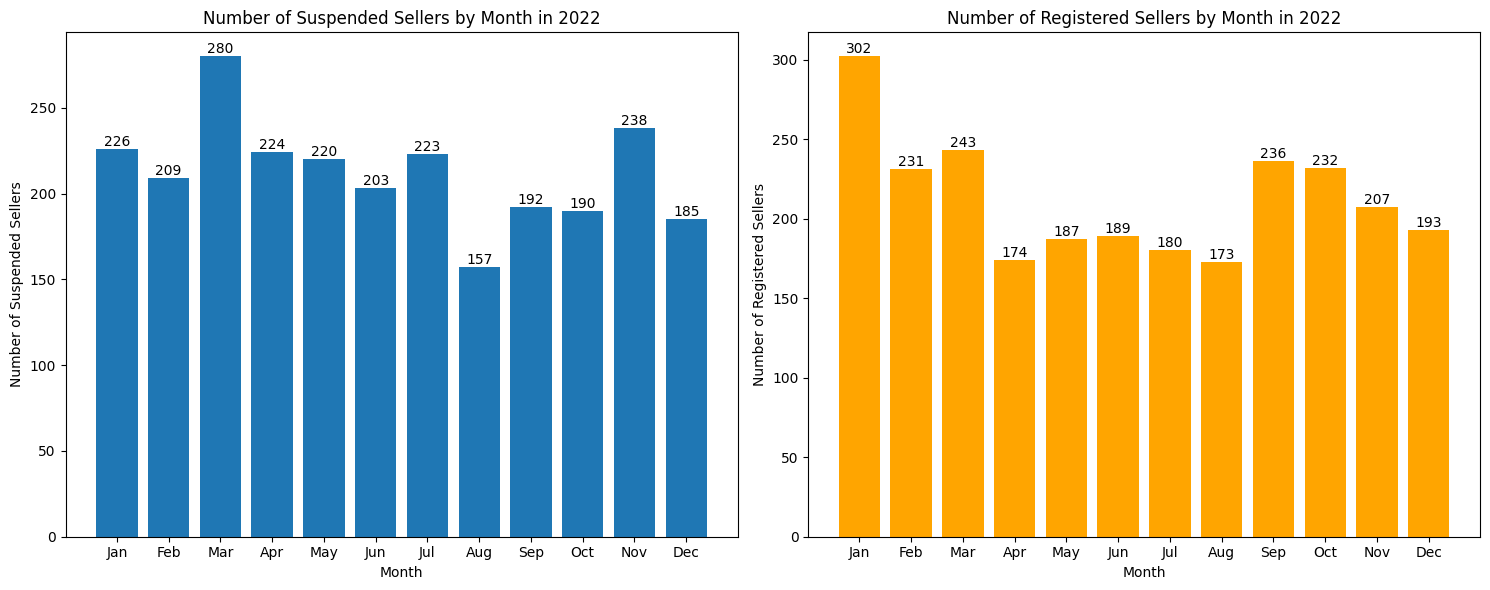

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2022 yılına ait verileri seçme
df_2022 = df[df['Suspended Date'].dt.year == 2022]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2022.groupby(df_2022['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2022.groupby(df_2022['Register Date'].dt.month)['Seller ID'].count()

# Subplot oluşturma
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Askıya alınan satıcı sayıları grafiği
axes[0].bar(monthly_suspended_counts.index, monthly_suspended_counts.values)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Suspended Sellers')
axes[0].set_title('Number of Suspended Sellers by Month in 2022')
axes[0].set_xticks(monthly_suspended_counts.index)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in axes[0].patches:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

# Kayıt olan satıcı sayıları grafiği
axes[1].bar(monthly_registered_counts.index, monthly_registered_counts.values, color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Registered Sellers')
axes[1].set_title('Number of Registered Sellers by Month in 2022')
axes[1].set_xticks(monthly_registered_counts.index)
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in axes[1].patches:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


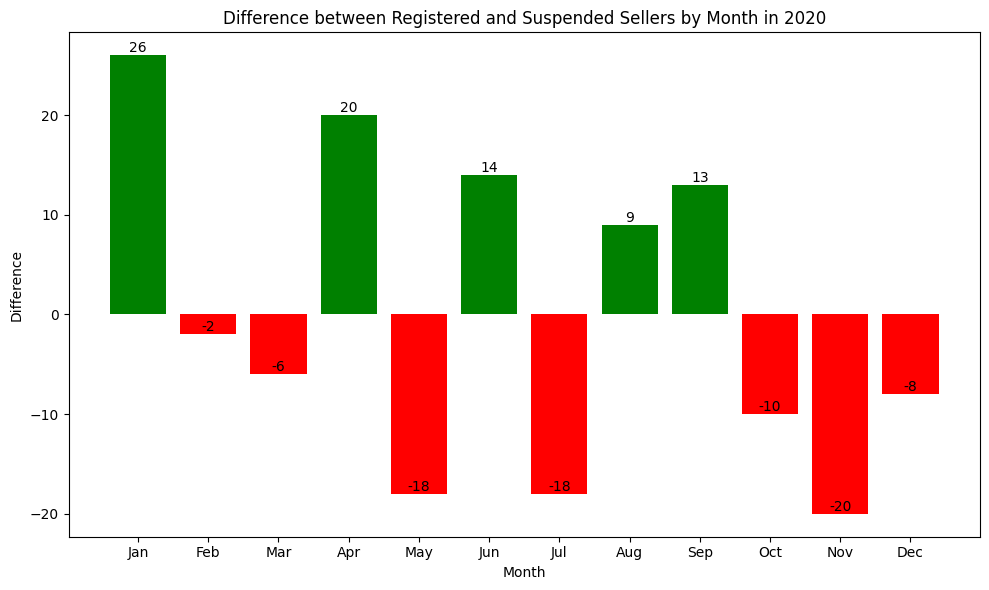

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2020 yılına ait verileri seçme
df_2020 = df[df['Suspended Date'].dt.year == 2020]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2020.groupby(df_2020['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2020.groupby(df_2020['Register Date'].dt.month)['Seller ID'].count()

# Aylara göre farkı hesaplama
monthly_difference = monthly_registered_counts - monthly_suspended_counts

# Grafik çizdirme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_difference.index, monthly_difference.values, color=['g' if diff >= 0 else 'r' for diff in monthly_difference.values])
plt.xlabel('Month')
plt.ylabel('Difference')
plt.title('Difference between Registered and Suspended Sellers by Month in 2020')
plt.xticks(monthly_difference.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


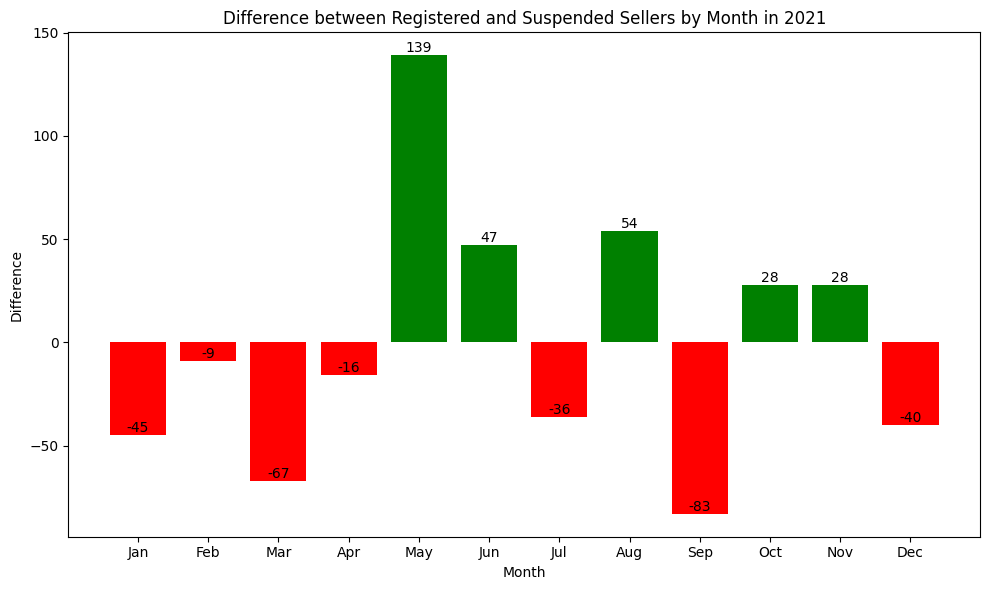

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2021 yılına ait verileri seçme
df_2021 = df[df['Suspended Date'].dt.year == 2021]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2021.groupby(df_2021['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2021.groupby(df_2021['Register Date'].dt.month)['Seller ID'].count()

# Aylara göre farkı hesaplama
monthly_difference = monthly_registered_counts - monthly_suspended_counts

# Grafik çizdirme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_difference.index, monthly_difference.values, color=['g' if diff >= 0 else 'r' for diff in monthly_difference.values])
plt.xlabel('Month')
plt.ylabel('Difference')
plt.title('Difference between Registered and Suspended Sellers by Month in 2021')
plt.xticks(monthly_difference.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


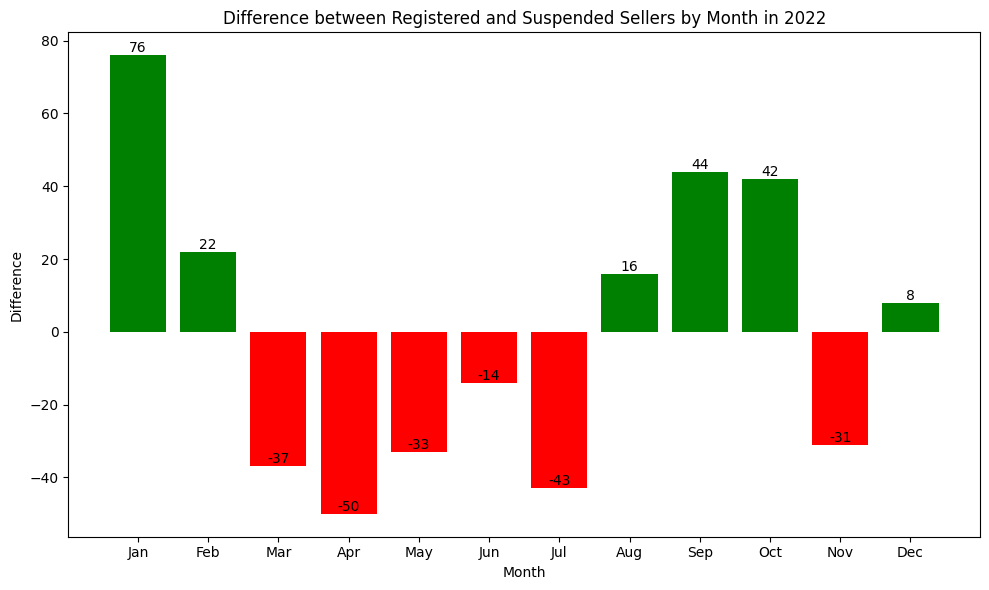

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2022 yılına ait verileri seçme
df_2022 = df[df['Suspended Date'].dt.year == 2022]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2022.groupby(df_2022['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2022.groupby(df_2022['Register Date'].dt.month)['Seller ID'].count()

# Aylara göre farkı hesaplama
monthly_difference = monthly_registered_counts - monthly_suspended_counts

# Grafik çizdirme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_difference.index, monthly_difference.values, color=['g' if diff >= 0 else 'r' for diff in monthly_difference.values])
plt.xlabel('Month')
plt.ylabel('Difference')
plt.title('Difference between Registered and Suspended Sellers by Month in 2022')
plt.xticks(monthly_difference.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


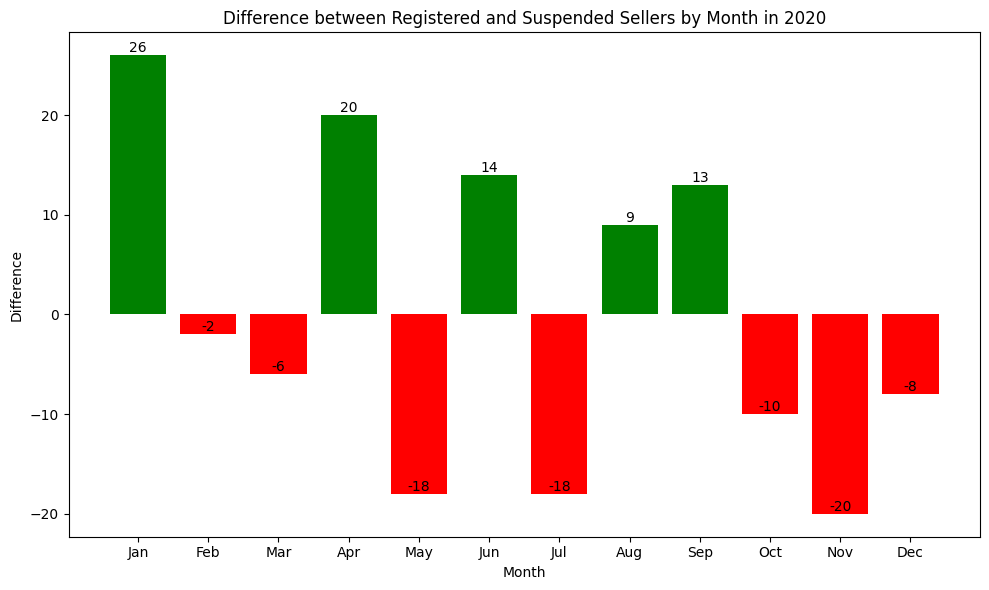

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2020 yılına ait verileri seçme
df_2020 = df[df['Suspended Date'].dt.year == 2020]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2020.groupby(df_2020['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2020.groupby(df_2020['Register Date'].dt.month)['Seller ID'].count()

# Aylara göre farkı hesaplama
monthly_difference = monthly_registered_counts - monthly_suspended_counts

# Grafik çizdirme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_difference.index, monthly_difference.values, color=['g' if diff >= 0 else 'r' for diff in monthly_difference.values])
plt.xlabel('Month')
plt.ylabel('Difference')
plt.title('Difference between Registered and Suspended Sellers by Month in 2020')
plt.xticks(monthly_difference.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

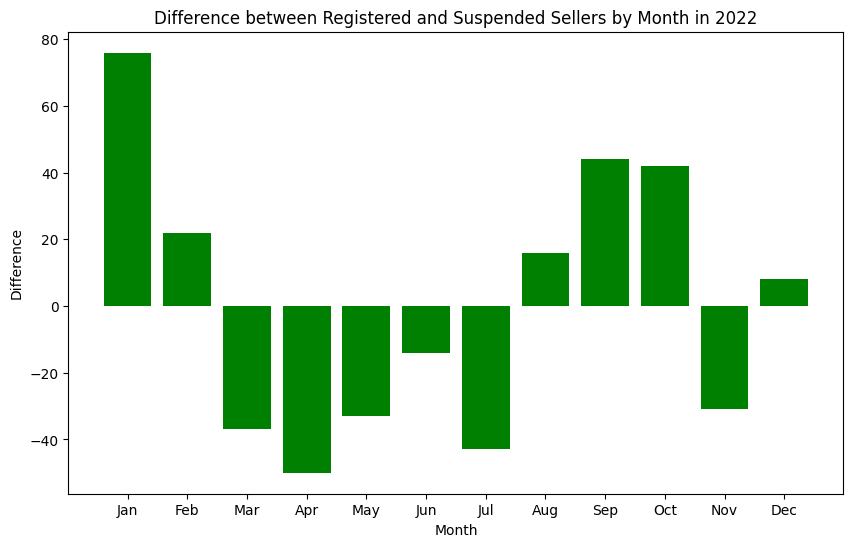

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# 2022 yılına ait verileri seçme
df_2022 = df[df['Suspended Date'].dt.year == 2022]

# Aylara göre askıya alınan satıcı sayısını hesaplama
monthly_suspended_counts = df_2022.groupby(df_2022['Suspended Date'].dt.month)['Seller ID'].count()

# Aylara göre kayıt olan satıcı sayısını hesaplama
monthly_registered_counts = df_2022.groupby(df_2022['Register Date'].dt.month)['Seller ID'].count()

# Aylara göre farkı hesaplama
monthly_difference = monthly_registered_counts - monthly_suspended_counts

# Grafik çizdirme
plt.figure(figsize=(10, 6))
plt.bar(monthly_difference.index, monthly_difference.values, color='green')
plt.xlabel('Month')
plt.ylabel('Difference')
plt.title('Difference between Registered and Suspended Sellers by Month in 2022')
plt.xticks(monthly_difference.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in plt.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

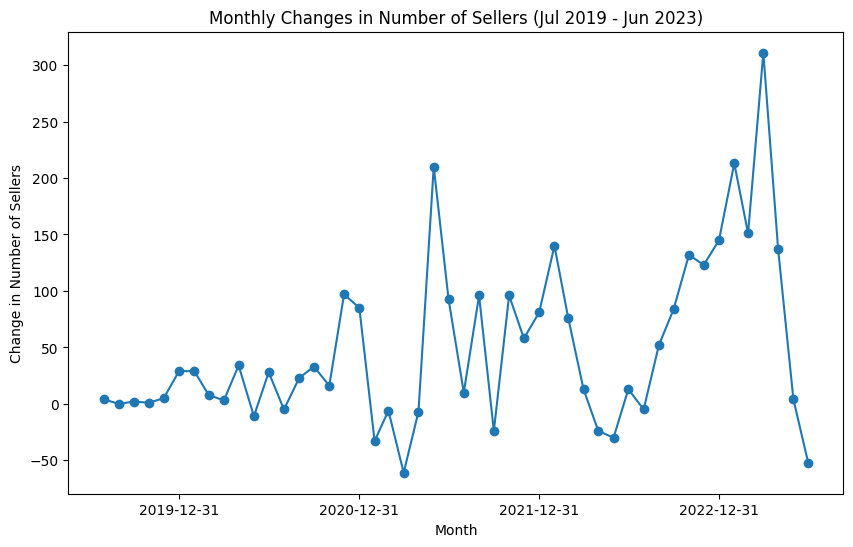

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" ve "Register Date" sütunlarını datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])
df['Register Date'] = pd.to_datetime(df['Register Date'])

# Başlangıç ve bitiş tarihlerini belirleme
start_date = pd.Timestamp('2019-07-01')
end_date = pd.Timestamp('2023-06-30')

# Tarih aralığını filtreleme
df_filtered = df[(df['Suspended Date'] >= start_date) & (df['Suspended Date'] <= end_date) |
                 (df['Register Date'] >= start_date) & (df['Register Date'] <= end_date)]

# Tarih aralığındaki her ay için artış sayılarını hesaplama
monthly_changes = []
current_date = start_date
while current_date <= end_date:
    next_date = current_date + pd.DateOffset(months=1)
    added = len(df_filtered[(df_filtered['Register Date'] < next_date) & 
                            (df_filtered['Register Date'] >= current_date)])
    removed = len(df_filtered[(df_filtered['Suspended Date'] < next_date) & 
                              (df_filtered['Suspended Date'] >= current_date)])
    current_count = added - removed if current_date != start_date else added
    monthly_changes.append(current_count)
    current_date = next_date

# Grafik çizdirme
# Grafik çizdirme
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=start_date, end=end_date, freq='M'), monthly_changes, marker='o')
plt.xlabel('Month')
plt.ylabel('Change in Number of Sellers')
plt.title('Monthly Changes in Number of Sellers (Jul 2019 - Jun 2023)')
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='Y'), [str(year) for year in range(start_date.year, end_date.year + 1)])
plt.tight_layout()
plt.show()



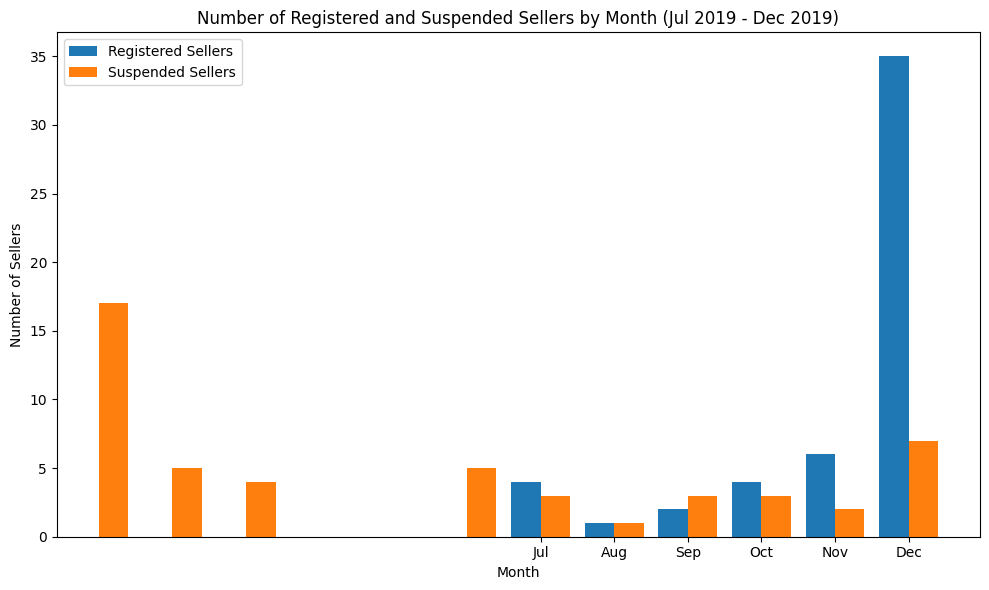

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Register Date" ve "Suspended Date" sütunlarını datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Başlangıç ve bitiş tarihleri belirleme
start_date = pd.Timestamp('2019-07-01')
end_date = pd.Timestamp('2019-12-31')

# Belirtilen tarih aralığındaki verileri seçme
df_selected = df[(df['Register Date'] >= start_date) & (df['Register Date'] <= end_date)]

# Aylara göre kayıt ve suspend olan satıcı sayılarını hesaplama
monthly_registered_counts = df_selected.groupby(df_selected['Register Date'].dt.month)['Seller ID'].count()
monthly_suspended_counts = df_selected.groupby(df_selected['Suspended Date'].dt.month)['Seller ID'].count()

# Çubuk grafik çizdirme
plt.figure(figsize=(10, 6))
plt.bar(monthly_registered_counts.index - 0.2, monthly_registered_counts.values, width=0.4, label='Registered Sellers')
plt.bar(monthly_suspended_counts.index + 0.2, monthly_suspended_counts.values, width=0.4, label='Suspended Sellers')
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Registered and Suspended Sellers by Month (Jul 2019 - Dec 2019)')
plt.xticks(monthly_registered_counts.index, ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


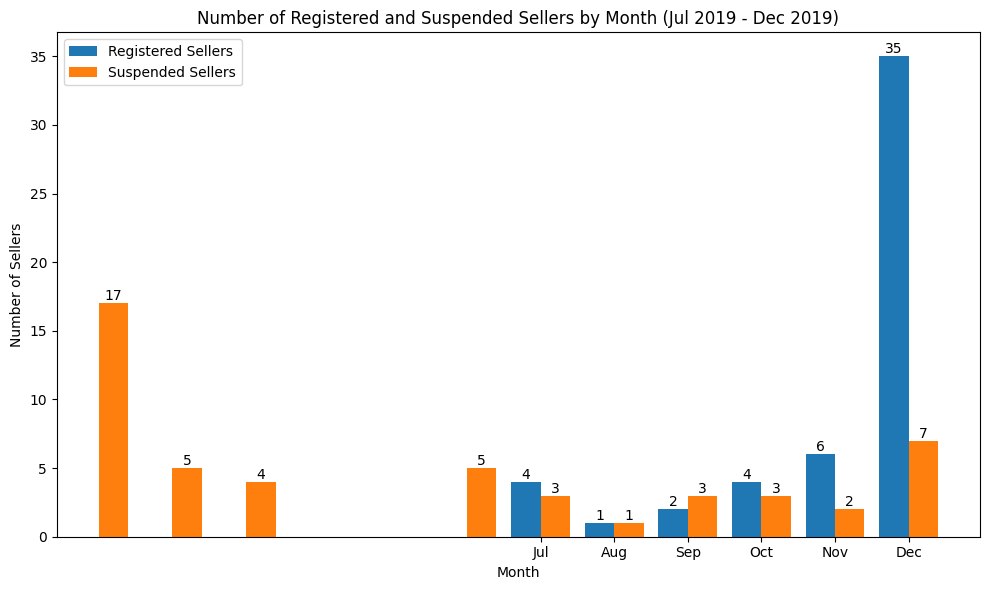

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Register Date" ve "Suspended Date" sütunlarını datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Başlangıç ve bitiş tarihleri belirleme
start_date = pd.Timestamp('2019-07-01')
end_date = pd.Timestamp('2019-12-31')

# Belirtilen tarih aralığındaki verileri seçme
df_selected = df[(df['Register Date'] >= start_date) & (df['Register Date'] <= end_date)]

# Aylara göre kayıt ve suspend olan satıcı sayılarını hesaplama
monthly_registered_counts = df_selected.groupby(df_selected['Register Date'].dt.month)['Seller ID'].count()
monthly_suspended_counts = df_selected.groupby(df_selected['Suspended Date'].dt.month)['Seller ID'].count()

# Çubuk grafik çizdirme
plt.figure(figsize=(10, 6))
bars1 = plt.bar(monthly_registered_counts.index - 0.2, monthly_registered_counts.values, width=0.4, label='Registered Sellers')
bars2 = plt.bar(monthly_suspended_counts.index + 0.2, monthly_suspended_counts.values, width=0.4, label='Suspended Sellers')
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Registered and Suspended Sellers by Month (Jul 2019 - Dec 2019)')
plt.xticks(monthly_registered_counts.index, ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Sadece 2019 yılında suspend olan satıcıları seçme
suspended_2019 = df[(df['Suspended Date'].dt.year == 2019) & (df['Status'] == 'Suspended')]

# Seçilen satıcıların suspend tarihlerini yazdırma
print("Suspended Sellers in 2019:")
for index, row in suspended_2019.iterrows():
    print(f"Seller ID: {row['Seller ID']}, Suspended Date: {row['Suspended Date']}")


Suspended Sellers in 2019:
Seller ID: Seller 2, Suspended Date: 2019-10-08 00:00:00
Seller ID: Seller 3, Suspended Date: 2019-10-31 00:00:00
Seller ID: Seller 4, Suspended Date: 2019-08-27 00:00:00
Seller ID: Seller 8, Suspended Date: 2019-10-31 00:00:00
Seller ID: Seller 11, Suspended Date: 2019-11-07 00:00:00
Seller ID: Seller 12, Suspended Date: 2019-12-05 00:00:00
Seller ID: Seller 13, Suspended Date: 2019-12-08 00:00:00
Seller ID: Seller 14, Suspended Date: 2019-12-11 00:00:00
Seller ID: Seller 15, Suspended Date: 2019-12-16 00:00:00
Seller ID: Seller 16, Suspended Date: 2019-12-31 00:00:00
Seller ID: Seller 19, Suspended Date: 2019-12-31 00:00:00


In [21]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Sadece Suspended Date sütununda 2019 yılına denk gelen satırları seçme
suspended_2019 = df[df['Suspended Date'].dt.year == 2019]

# Seçilen satırları yazdırma
print(suspended_2019)


     Register Date Suspended Date  Seller ID Registration Source  \
3586    2019-07-16     2019-10-08   Seller 2                 NaN   
3587    2019-07-23     2019-10-31   Seller 3                 NaN   
3588    2019-07-28     2019-08-27   Seller 4                 NaN   
3592    2019-10-01     2019-10-31   Seller 8                 NaN   
3595    2019-10-08     2019-11-07  Seller 11                 NaN   
3596    2019-11-04     2019-12-05  Seller 12                 NaN   
3597    2019-11-08     2019-12-08  Seller 13                 NaN   
3598    2019-11-11     2019-12-11  Seller 14                 NaN   
3599    2019-11-16     2019-12-16  Seller 15                 NaN   
3600    2019-11-17     2019-12-31  Seller 16                 NaN   
3603    2019-12-01     2019-12-31  Seller 19                 NaN   

      Total Account Count  Total Product Count  Total Income  Total Profit  \
3586                    1                    0             0             0   
3587                    1  

In [22]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# "Register Day", "Register Month" ve "Register Year" sütunlarını eklemek
df['Register Day'] = df['Register Date'].dt.day
df['Register Month'] = df['Register Date'].dt.month
df['Register Year'] = df['Register Date'].dt.year

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspend Day", "Suspend Month" ve "Suspend Year" sütunlarını eklemek
df['Suspended Day'] = df['Suspended Date'].dt.day
df['Suspended Month'] = df['Suspended Date'].dt.month
df['Suspended Year'] = df['Suspended Date'].dt.year

# Eksik "Suspended Date" değerlerini 30.06.2023 olarak doldurma
df['Suspended Date'].fillna(pd.Timestamp('2023-06-30'), inplace=True)

# Verileri gösterme
print(df)


     Register Date Suspended Date    Seller ID Registration Source  \
0       2023-03-14     2023-06-30  Seller 6851                zoom   
1       2022-10-04     2022-11-20  Seller 4879              yutube   
2       2023-04-04     2023-06-30  Seller 7245               yutub   
3       2022-10-12     2023-06-07  Seller 4953     YÜCESOY TİCARET   
4       2022-10-21     2022-11-20  Seller 5047             YÜCESOY   
...            ...            ...          ...                 ...   
8304    2022-09-25     2023-06-30  Seller 4816                 NaN   
8305    2022-09-26     2022-11-25  Seller 4817                 NaN   
8306    2022-09-26     2023-06-30  Seller 4819                 NaN   
8307    2022-10-01     2022-10-15  Seller 4852                 NaN   
8308    2022-10-30     2023-06-30  Seller 5156                 NaN   

      Total Account Count  Total Product Count  Total Income  Total Profit  \
0                       1                    0             0             0   
1  

In [23]:
df.head()

,Register Date,Suspended Date,Seller ID,Registration Source,Total Account Count,Total Product Count,Total Income,Total Profit,Status,Cancellation Reason,Register Day,Register Month,Register Year,Suspended Day,Suspended Month,Suspended Year
0,2023-03-14,2023-06-30,Seller 6851,zoom,1,0,0,0,Active,NaN,14,3,2023,NaN,NaN,NaN
1,2022-10-04,2022-11-20,Seller 4879,yutube,2,934,39,3,Suspended,i_can_not_find_product,4,10,2022,20.0,11.0,2022.0
2,2023-04-04,2023-06-30,Seller 7245,yutub,7,6065,666,88,Active,could_not_sell,4,4,2023,NaN,NaN,NaN
3,2022-10-12,2023-06-07,Seller 4953,YÜCESOY TİCARET,3,25,8363,1172,Suspended,amazon_suspended,12,10,2022,7.0,6.0,2023.0
4,2022-10-21,2022-11-20,Seller 5047,YÜCESOY,3,345,0,0,Suspended,i_can_not_find_product,21,10,2022,20.0,11.0,2022.0


In [80]:
import pandas as pd

# Excel dosyasını oku
excel_path = "All_Users_With_New_Columns.xlsx"
df = pd.read_excel(excel_path)

# Verileri işle
data = []
for index, row in df.iterrows():
    month = row["Register Month"]
    incoming_users = row["Total Account Count"]
    suspended_users = row["Suspended Month"]

    data.append({
        "ay": month,
        "gelen_uye": incoming_users,
        "suspend_uye": suspended_users
    })

# Sonuçları işle
result_data = []
for ay in data:
    register_year_2019 = df[(df["Register Year"] == 2019) & (df["Register Month"] == 7)]["Total Account Count"].sum()
    suspended_year_2019 = df[(df["Suspended Year"] == 2019) & (df["Suspended Month"] == 7)]["Suspended Month"].sum()
    
    result_data.append({
        "ay": ay["ay"],
        "gelen_uye": register_year_2019,
        "suspend_uye": suspended_year_2019
    })

# Sonuçları yazdır
for sonuc in result_data:
    print(f"{sonuc['ay']} ayında aktif üye sayısı: {sonuc['gelen_uye']}")
    print(f"   {sonuc['ay']} ayında suspend olan üye sayısı: {sonuc['suspend_uye']}")


3 ayında aktif üye sayısı: 4
   3 ayında suspend olan üye sayısı: 0.0
10 ayında aktif üye sayısı: 4
   10 ayında suspend olan üye sayısı: 0.0
4 ayında aktif üye sayısı: 4
   4 ayında suspend olan üye sayısı: 0.0
10 ayında aktif üye sayısı: 4
   10 ayında suspend olan üye sayısı: 0.0
10 ayında aktif üye sayısı: 4
   10 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif üye sayısı: 4
   9 ayında suspend olan üye sayısı: 0.0
9 ayında aktif

In [81]:
import pandas as pd

# Excel dosyasını oku
excel_path = "All_Users_With_New_Columns.xlsx"
df = pd.read_excel(excel_path)

# Hesaplamalar için boş bir liste oluştur
data = []

# Temmuz ayında aktif olan üyelerden suspend olanları çıkar
temmuz_aktif = df[(df["Register Year"] == 2019) & (df["Register Month"] == 7) & (df["Status"] == "Active")]
temmuz_suspend = df[(df["Suspended Year"] == 2019) & (df["Suspended Month"] == 7)]
temmuz_aktif_sonuc = len(temmuz_aktif) - len(temmuz_suspend)
data.append({"ay": "temmuz", "gelen_uye": temmuz_aktif_sonuc, "suspend_uye": len(temmuz_suspend)})

# Ağustos ayında aktif olan üyelerden suspend olanları çıkar
agustos_aktif = df[(df["Register Year"] == 2019) & (df["Register Month"] == 8) & (df["Status"] == "Active")]
agustos_suspend = df[(df["Suspended Year"] == 2019) & (df["Suspended Month"] == 8)]
agustos_aktif_sonuc = len(agustos_aktif) - len(agustos_suspend)
data.append({"ay": "ağustos", "gelen_uye": agustos_aktif_sonuc, "suspend_uye": len(agustos_suspend)})

# Eylül ayında aktif olan üyelerden suspend olanları çıkar
eylul_aktif = df[(df["Register Year"] == 2019) & (df["Register Month"] == 9) & (df["Status"] == "Active")]
eylul_suspend = df[(df["Suspended Year"] == 2019) & (df["Suspended Month"] == 9)]
eylul_aktif_sonuc = len(eylul_aktif) - len(eylul_suspend)
data.append({"ay": "eylül", "gelen_uye": eylul_aktif_sonuc, "suspend_uye": len(eylul_suspend)})

# ... Diğer aylar için aynı şekilde devam edebilirsiniz

# Elde edilen verileri yazdır
for veri in data:
    ay = veri["ay"]
    gelen_uye = veri["gelen_uye"]
    suspend_uye = veri["suspend_uye"]
    print(f"{ay} ayında aktif üye sayısı: {gelen_uye} suspend olan üye sayısı: {suspend_uye}")


temmuz ayında aktif üye sayısı: 0 suspend olan üye sayısı: 0
ağustos ayında aktif üye sayısı: -1 suspend olan üye sayısı: 1
eylül ayında aktif üye sayısı: 1 suspend olan üye sayısı: 0


In [60]:
import pandas as pd

# Excel dosyasını oku
excel_path = "All_Users_With_New_Columns.xlsx"
df = pd.read_excel(excel_path)

# Verileri işle ve analiz yap
data = []
for month in [7, 8, 9, 10, 11, 12]:
    filter_register = (df["Register Year"] == 2019) & (df["Register Month"] == month)
    filter_suspend = (df["Suspended Year"] == 2019) & (df["Suspended Month"] == month)
    
    gelen_uye = df.loc[filter_register, "Register Month"].count()
    suspend_uye = df.loc[filter_suspend, "Suspended Month"].count()
    
    data.append({"ay": month, "gelen_uye": gelen_uye, "suspend_uye": suspend_uye})

# Analiz sonuçlarını işle ve yazdır
aktif_uye_sayisi = 0
sonuclar = []

for ay in data:
    gelen_uye = ay["gelen_uye"]
    suspend_uye = ay["suspend_uye"]
    aktif_uye_sayisi = aktif_uye_sayisi + gelen_uye - suspend_uye
    sonuclar.append({"ay": ay["ay"], "aktif_uye_sayisi": aktif_uye_sayisi})

for sonuc in sonuclar:
    print(f"{sonuc['ay']} ayında aktif üye sayısı: {sonuc['aktif_uye_sayisi']}")


7 ayında aktif üye sayısı: 4
8 ayında aktif üye sayısı: 4
9 ayında aktif üye sayısı: 6
10 ayında aktif üye sayısı: 7
11 ayında aktif üye sayısı: 12
12 ayında aktif üye sayısı: 41


In [61]:
import pandas as pd

# Excel dosyasını oku
excel_path = "All_Users_With_New_Columns.xlsx"
df = pd.read_excel(excel_path)

# Verileri işle ve analiz yap
data = []
for month in [7, 8, 9, 10, 11, 12]:
    filter_register = (df["Register Year"] == 2019) & (df["Register Month"] == month)
    filter_suspend = (df["Suspended Year"] == 2019) & (df["Suspended Month"] == month)
    
    gelen_uye = df.loc[filter_register, "Register Month"].count()
    suspend_uye = df.loc[filter_suspend, "Suspended Month"].count()
    
    data.append({"ay": month, "gelen_uye": gelen_uye, "suspend_uye": suspend_uye})

# Analiz sonuçlarını işle ve yazdır
aktif_uye_sayisi = 0
sonuclar = []

for ay in data:
    gelen_uye = ay["gelen_uye"]
    suspend_uye = ay["suspend_uye"]
    aktif_uye_sayisi = aktif_uye_sayisi + gelen_uye - suspend_uye
    sonuclar.append({"ay": ay["ay"], "aktif_uye_sayisi": aktif_uye_sayisi})

for sonuc in sonuclar:
    print(f"{sonuc['ay']} ayında aktif üye sayısı: {sonuc['aktif_uye_sayisi']}")


7 ayında aktif üye sayısı: 4
8 ayında aktif üye sayısı: 4
9 ayında aktif üye sayısı: 6
10 ayında aktif üye sayısı: 7
11 ayında aktif üye sayısı: 12
12 ayında aktif üye sayısı: 41


In [46]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif üye sayılarını hesaplama
active_counts_by_month = {}
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == month) & (df['Status'] == 'Active'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        active_counts_by_month[month] = active_counts_by_month[prev_month] + df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == month) & (df['Status'] == 'Active'), 'Seller ID'].count()

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    print(f"2019 yılı {month} ayında active üye sayısı:", active_count)


2019 yılı Jan ayında active üye sayısı: 0
2019 yılı Feb ayında active üye sayısı: 0
2019 yılı Mar ayında active üye sayısı: 0
2019 yılı Apr ayında active üye sayısı: 0
2019 yılı May ayında active üye sayısı: 0
2019 yılı Jun ayında active üye sayısı: 0
2019 yılı Jul ayında active üye sayısı: 0
2019 yılı Aug ayında active üye sayısı: 0
2019 yılı Sep ayında active üye sayısı: 0
2019 yılı Oct ayında active üye sayısı: 0
2019 yılı Nov ayında active üye sayısı: 0
2019 yılı Dec ayında active üye sayısı: 0


In [47]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif üye sayılarını hesaplama
active_counts_by_month = {}
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        active_counts_by_month[month] = active_counts_by_month[prev_month] + df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active'), 'Seller ID'].count()

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    print(f"2019 yılı {month} ayında active üye sayısı:", active_count)


2019 yılı Jan ayında active üye sayısı: 0
2019 yılı Feb ayında active üye sayısı: 0
2019 yılı Mar ayında active üye sayısı: 1
2019 yılı Apr ayında active üye sayısı: 1
2019 yılı May ayında active üye sayısı: 1
2019 yılı Jun ayında active üye sayısı: 2
2019 yılı Jul ayında active üye sayısı: 2
2019 yılı Aug ayında active üye sayısı: 2
2019 yılı Sep ayında active üye sayısı: 2
2019 yılı Oct ayında active üye sayısı: 2
2019 yılı Nov ayında active üye sayısı: 2
2019 yılı Dec ayında active üye sayısı: 2


In [54]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif ve suspend üye sayılarını hesaplama
active_counts_by_month = {}
suspend_counts_by_month = {}
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
        suspend_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Active' 'Suspended'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        new_active_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
        new_suspend_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active' ), 'Seller ID'].count()
        active_counts_by_month[month] = active_counts_by_month[prev_month] + new_active_count - new_suspend_count
        suspend_counts_by_month[month] = suspend_counts_by_month[prev_month] + new_suspend_count

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    suspend_count = suspend_counts_by_month[month]
    print(f"2019 yılı {month} ayında active üye sayısı:", suspend_count)
    print(f"2019 yılı {month} ayında suspend üye sayısı:", active_count )
    print("------")


2019 yılı Jul ayında active üye sayısı: 0
2019 yılı Jul ayında suspend üye sayısı: 4
------
2019 yılı Aug ayında active üye sayısı: 0
2019 yılı Aug ayında suspend üye sayısı: 5
------
2019 yılı Sep ayında active üye sayısı: 1
2019 yılı Sep ayında suspend üye sayısı: 5
------
2019 yılı Oct ayında active üye sayısı: 1
2019 yılı Oct ayında suspend üye sayısı: 9
------
2019 yılı Nov ayında active üye sayısı: 1
2019 yılı Nov ayında suspend üye sayısı: 15
------
2019 yılı Dec ayında active üye sayısı: 2
2019 yılı Dec ayında suspend üye sayısı: 48
------


In [52]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif ve suspend üye sayılarını hesaplama
active_counts_by_month = {}
suspend_counts_by_month = {}
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        suspend_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        new_active_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        new_suspend_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Suspended' ), 'Seller ID'].count()
        active_counts_by_month[month] = active_counts_by_month[prev_month] + new_active_count - new_suspend_count
        suspend_counts_by_month[month] = suspend_counts_by_month[prev_month] + new_suspend_count

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    suspend_count = suspend_counts_by_month[month]
    print(f"2019 yılı {month} ayında active üye sayısı:", suspend_count )
    print(f"2019 yılı {month} ayında suspend üye sayısı:", active_count )
    print("------")


2019 yılı Jul ayında active üye sayısı: 4
2019 yılı Jul ayında suspend üye sayısı: 0
------
2019 yılı Aug ayında active üye sayısı: 5
2019 yılı Aug ayında suspend üye sayısı: -1
------
2019 yılı Sep ayında active üye sayısı: 6
2019 yılı Sep ayında suspend üye sayısı: -1
------
2019 yılı Oct ayında active üye sayısı: 10
2019 yılı Oct ayında suspend üye sayısı: -5
------
2019 yılı Nov ayında active üye sayısı: 16
2019 yılı Nov ayında suspend üye sayısı: -11
------
2019 yılı Dec ayında active üye sayısı: 50
2019 yılı Dec ayında suspend üye sayısı: -44
------


In [55]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif ve suspend üye sayılarını hesaplama
active_counts_by_month = {}
suspend_counts_by_month = {}
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        suspend_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        new_active_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        new_suspend_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
        active_counts_by_month[month] = active_counts_by_month[prev_month] + new_active_count - new_suspend_count
        suspend_counts_by_month[month] = suspend_counts_by_month[prev_month] + new_suspend_count

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    suspend_count = suspend_counts_by_month[month]
    print(f"2019 yılı {month} ayında active üye sayısı:", active_count)
    print(f"2019 yılı {month} ayında suspend üye sayısı:", suspend_count)
    print("------")


2019 yılı Jul ayında active üye sayısı: 0
2019 yılı Jul ayında suspend üye sayısı: 4
------
2019 yılı Aug ayında active üye sayısı: -1
2019 yılı Aug ayında suspend üye sayısı: 5
------
2019 yılı Sep ayında active üye sayısı: -1
2019 yılı Sep ayında suspend üye sayısı: 6
------
2019 yılı Oct ayında active üye sayısı: -5
2019 yılı Oct ayında suspend üye sayısı: 10
------
2019 yılı Nov ayında active üye sayısı: -11
2019 yılı Nov ayında suspend üye sayısı: 16
------
2019 yılı Dec ayında active üye sayısı: -44
2019 yılı Dec ayında suspend üye sayısı: 50
------


In [56]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif ve suspend üye sayılarını hesaplama
active_counts_by_month = {}
suspend_counts_by_month = {}
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, month in enumerate(months):
    if i == 0:
        active_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        suspend_counts_by_month[month] = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
    else:
        prev_month = months[i - 1]
        new_active_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        new_suspend_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
        active_counts_by_month[month] = active_counts_by_month[prev_month] + new_active_count - new_suspend_count
        suspend_counts_by_month[month] = suspend_counts_by_month[prev_month] + new_suspend_count

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    suspend_count = suspend_counts_by_month[month]
    print(f"2019 yılı {month} ayında active üye sayısı:", active_count)
    print(f"2019 yılı {month} ayında suspend üye sayısı:", suspend_count)
    print("------")


2019 yılı Jul ayında active üye sayısı: 0
2019 yılı Jul ayında suspend üye sayısı: 4
------
2019 yılı Aug ayında active üye sayısı: -1
2019 yılı Aug ayında suspend üye sayısı: 5
------
2019 yılı Sep ayında active üye sayısı: -1
2019 yılı Sep ayında suspend üye sayısı: 6
------
2019 yılı Oct ayında active üye sayısı: -5
2019 yılı Oct ayında suspend üye sayısı: 10
------
2019 yılı Nov ayında active üye sayısı: -11
2019 yılı Nov ayında suspend üye sayısı: 16
------
2019 yılı Dec ayında active üye sayısı: -44
2019 yılı Dec ayında suspend üye sayısı: 50
------


In [57]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Ay isimleri ve hesaplama başlangıcı
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
active_counts_by_month = {'Jul': 0}  # Temmuz ayı başlangıcı

for i, month in enumerate(months):
    if i == 0:
        continue  # Temmuz ayı başladığımız nokta
    else:
        prev_month = months[i - 1]
        new_active_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Active'), 'Seller ID'].count()
        new_suspend_count = df.loc[(df['Register Year'] == 2019) & (df['Register Month'] == i + 7) & (df['Status'] == 'Suspended'), 'Seller ID'].count()
        active_counts_by_month[month] = active_counts_by_month[prev_month] + new_active_count - new_suspend_count

# Sonuçları yazdırma
for month, active_count in active_counts_by_month.items():
    print(f"2019 yılı {month} ayında active üye sayısı:", active_count)
    print("------")


2019 yılı Jul ayında active üye sayısı: 0
------
2019 yılı Aug ayında active üye sayısı: -1
------
2019 yılı Sep ayında active üye sayısı: -1
------
2019 yılı Oct ayında active üye sayısı: -5
------
2019 yılı Nov ayında active üye sayısı: -11
------
2019 yılı Dec ayında active üye sayısı: -44
------


In [58]:
data = [
    {"ay": "temmuz", "gelen_uye": 5, "suspend_uye": 1},
    {"ay": "ağustos", "gelen_uye": 2, "suspend_uye": 3},
    {"ay": "eylül", "gelen_uye": 7, "suspend_uye": 9},
    {"ay": "ekim", "gelen_uye": 40, "suspend_uye": 35},
    {"ay": "kasım", "gelen_uye": 60, "suspend_uye": 50},
    {"ay": "aralık", "gelen_uye": 4, "suspend_uye": 18}
]

aktif_uye_sayisi = 0
sonuclar = []

for ay in data:
    gelen_uye = ay["gelen_uye"]
    suspend_uye = ay["suspend_uye"]
    aktif_uye_sayisi = aktif_uye_sayisi + gelen_uye - suspend_uye
    sonuclar.append({"ay": ay["ay"], "aktif_uye_sayisi": aktif_uye_sayisi})

for sonuc in sonuclar:
    print(f"{sonuc['ay']} ayında aktif üye sayısı: {sonuc['aktif_uye_sayisi']}")


temmuz ayında aktif üye sayısı: 4
ağustos ayında aktif üye sayısı: 3
eylül ayında aktif üye sayısı: 1
ekim ayında aktif üye sayısı: 6
kasım ayında aktif üye sayısı: 16
aralık ayında aktif üye sayısı: 2


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Register Date" sütununu datetime formatına çevirme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# "Register Day", "Register Month" ve "Register Year" sütunlarını eklemek
df['Register Day'] = df['Register Date'].dt.day
df['Register Month'] = df['Register Date'].dt.month
df['Register Year'] = df['Register Date'].dt.year

# "Suspended Date" sütununu datetime formatına çevirme
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspend Day", "Suspend Month" ve "Suspend Year" sütunlarını eklemek
df['Suspended Day'] = df['Suspended Date'].dt.day
df['Suspended Month'] = df['Suspended Date'].dt.month
df['Suspended Year'] = df['Suspended Date'].dt.year

# Eksik "Suspended Date" değerlerini 30.06.2023 olarak doldurma
df['Suspended Date'].fillna(pd.Timestamp('2023-06-30'), inplace=True)

# Yeni sütunları kaydetme
df.to_excel('All_Users_With_New_Columns.xlsx', index=False)

# Yeni veri setini gösterme
print(df)


     Register Date Suspended Date    Seller ID Registration Source  \
0       2023-03-14     2023-06-30  Seller 6851                zoom   
1       2022-10-04     2022-11-20  Seller 4879              yutube   
2       2023-04-04     2023-06-30  Seller 7245               yutub   
3       2022-10-12     2023-06-07  Seller 4953     YÜCESOY TİCARET   
4       2022-10-21     2022-11-20  Seller 5047             YÜCESOY   
...            ...            ...          ...                 ...   
8304    2022-09-25     2023-06-30  Seller 4816                 NaN   
8305    2022-09-26     2022-11-25  Seller 4817                 NaN   
8306    2022-09-26     2023-06-30  Seller 4819                 NaN   
8307    2022-10-01     2022-10-15  Seller 4852                 NaN   
8308    2022-10-30     2023-06-30  Seller 5156                 NaN   

      Total Account Count  Total Product Count  Total Income  Total Profit  \
0                       1                    0             0             0   
1  

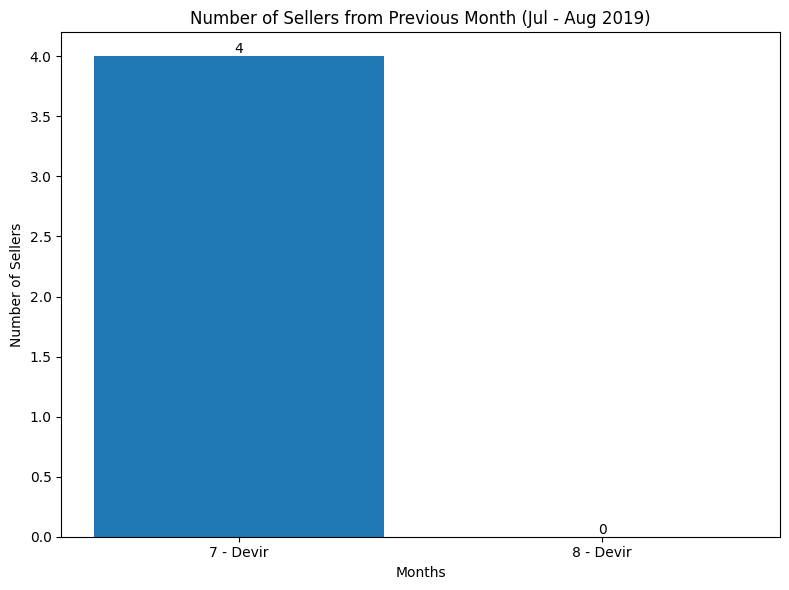

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 yılının 7. ayındaki "Register" ve "Suspend" sayılarını bulma
register_2019_7 = df[(df['Register Year'] == 2019) & (df['Register Month'] == 7)].shape[0]
suspend_2019_7 = df[(df['Suspended Year'] == 2019) & (df['Suspended Month'] == 7)].shape[0]

# 7. aydan devir hesaplama
devir_7 = register_2019_7 - suspend_2019_7

# 2019 yılının 8. ayındaki "Register" ve "Suspend" sayılarını bulma
register_2019_8 = df[(df['Register Year'] == 2019) & (df['Register Month'] == 8)].shape[0]
suspend_2019_8 = df[(df['Suspended Year'] == 2019) & (df['Suspended Month'] == 8)].shape[0]

# 8. aydan devir hesaplama
devir_8 = register_2019_8 - suspend_2019_8

# Çubuk grafik oluşturma
months = ['7 - Devir', '8 - Devir']
values = [devir_7, devir_8]

plt.figure(figsize=(8, 6))
bars = plt.bar(months, values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Jul - Aug 2019)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


In [36]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 yılına ait verileri seçme
df_2019 = df[df['Register Year'] == 2019]

# Aktif ve pasif satıcı sayılarını hesaplama
active_sellers_2019 = df_2019[df_2019['Status'] == 'Active'].shape[0]
suspended_sellers_2019 = df_2019[df_2019['Status'] == 'Suspended'].shape[0]

print("2019 Yılı Aktif Seller Sayısı:", active_sellers_2019)
print("2019 Yılı Pasif Seller Sayısı:", suspended_sellers_2019)


2019 Yılı Aktif Seller Sayısı: 2
2019 Yılı Pasif Seller Sayısı: 50


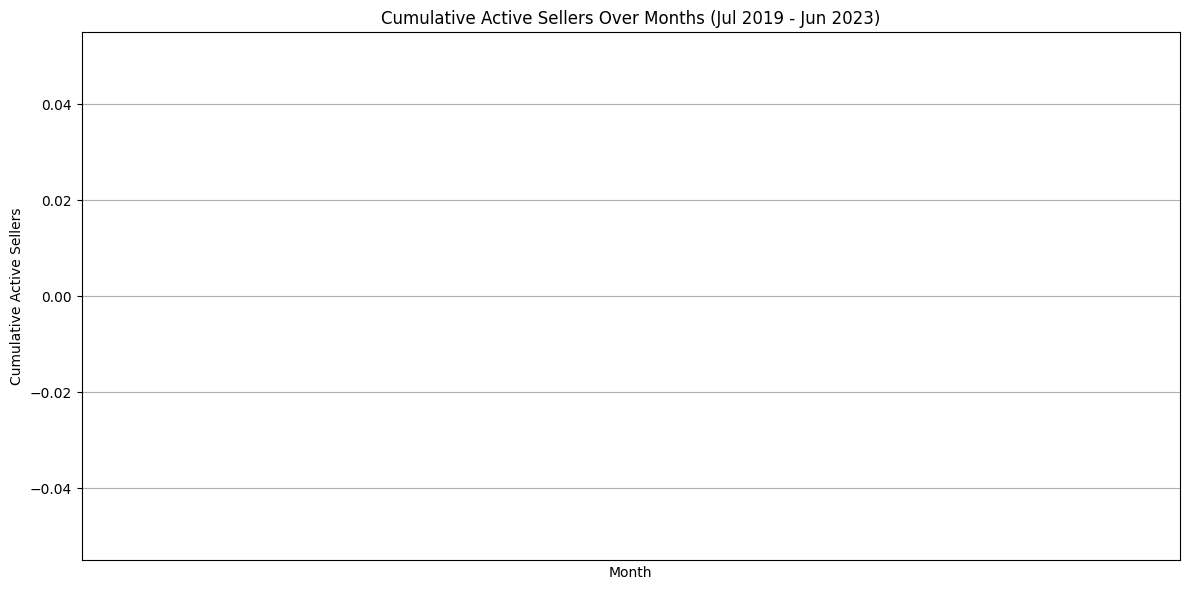

2023 Haziran Ayı Aktif Üye Sayısı: 1828


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 Temmuz ayından 2023 Haziran ayına kadar olan verileri seçme
df_selected = df[(df['Register Year'] >= 2019) & (df['Register Month'] >= 7) & (df['Register Year'] <= 2023) & (df['Register Month'] <= 6)]

# Her ayın başında kayıt olan üye sayısını hesaplama
monthly_new_sellers = df_selected.groupby(['Register Year', 'Register Month'])['Seller ID'].count().reset_index()

# Her ayın sonunda aktif üye sayısını hesaplama
monthly_cumulative_sellers = monthly_new_sellers.groupby(['Register Year', 'Register Month'])['Seller ID'].cumsum()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(monthly_cumulative_sellers, marker='o')
plt.xlabel('Month')
plt.ylabel('Cumulative Active Sellers')
plt.title('Cumulative Active Sellers Over Months (Jul 2019 - Jun 2023)')
plt.grid(True)
plt.xticks(range(len(monthly_cumulative_sellers)), monthly_cumulative_sellers.index, rotation=45)
plt.tight_layout()
plt.show()

# 2023 Haziran ayındaki aktif üye sayısı
active_sellers_june_2023 = df[(df['Register Year'] <= 2023) & (df['Register Month'] <= 6) & (df['Status'] == 'Active')].shape[0]
print("2023 Haziran Ayı Aktif Üye Sayısı:", active_sellers_june_2023)


KeyError: 'Register Month'

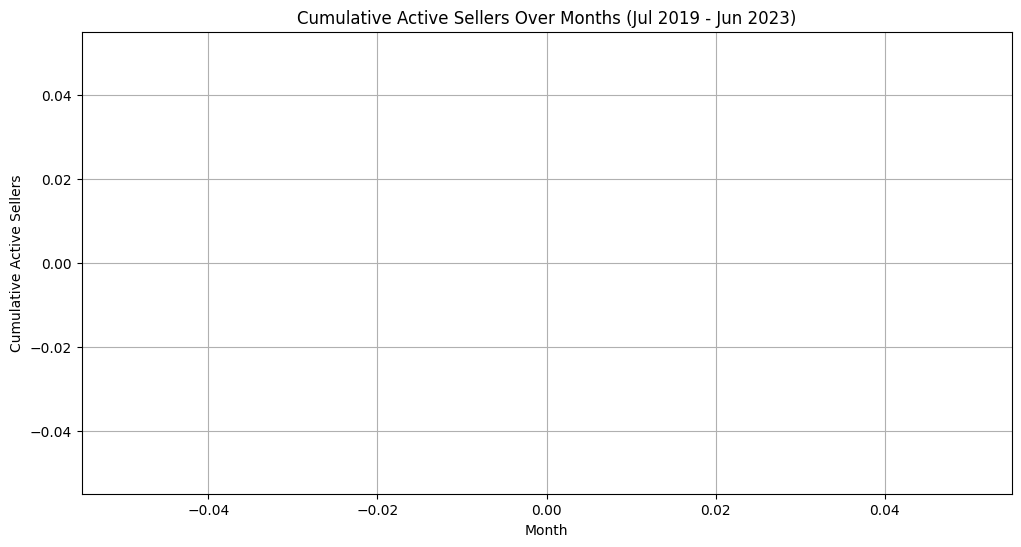

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 Temmuz ayından 2023 Haziran ayına kadar olan verileri seçme
df_selected = df[(df['Register Year'] >= 2019) & (df['Register Month'] >= 7) & (df['Register Year'] <= 2023) & (df['Register Month'] <= 6)]

# Her ayın başında kayıt olan üye sayısını hesaplama
monthly_new_sellers = df_selected.groupby(['Register Year', 'Register Month'])['Seller ID'].count().reset_index()

# Her ayın sonunda aktif üye sayısını hesaplama
monthly_cumulative_sellers = monthly_new_sellers.groupby(['Register Year', 'Register Month'])['Seller ID'].cumsum()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(monthly_cumulative_sellers, marker='o')
plt.xlabel('Month')
plt.ylabel('Cumulative Active Sellers')
plt.title('Cumulative Active Sellers Over Months (Jul 2019 - Jun 2023)')
plt.grid(True)
plt.xticks(range(len(monthly_cumulative_sellers)), monthly_cumulative_sellers['Register Month'], rotation=45)
plt.tight_layout()
plt.show()

# 2023 Haziran ayındaki aktif üye sayısı
active_sellers_june_2023 = df[(df['Register Year'] <= 2023) & (df['Register Month'] == 6) & (df['Status'] == 'Active')].shape[0]
print("2023 Haziran Ayı Aktif Üye Sayısı:", active_sellers_june_2023)


KeyError: 'Register Year'

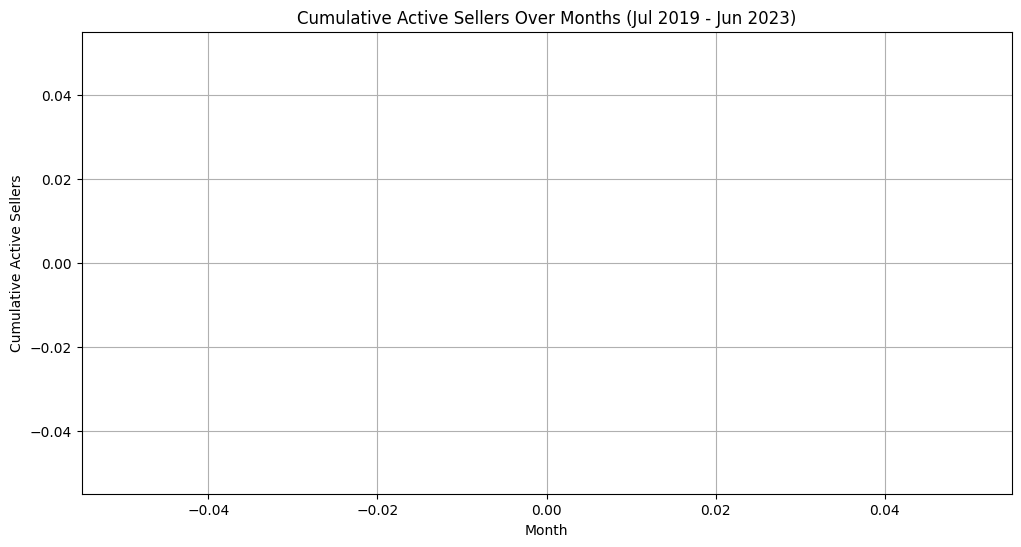

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 Temmuz ayından 2023 Haziran ayına kadar olan verileri seçme
df_selected = df[(df['Register Year'] >= 2019) & (df['Register Month'] >= 7) & (df['Register Year'] <= 2023) & (df['Register Month'] <= 6)]

# Her ayın başında kayıt olan üye sayısını hesaplama
monthly_new_sellers = df_selected.groupby(['Register Year', 'Register Month'])['Seller ID'].count().reset_index()

# Her ayın sonunda aktif üye sayısını hesaplama
monthly_cumulative_sellers = monthly_new_sellers.groupby(['Register Year', 'Register Month'])['Seller ID'].cumsum()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(monthly_cumulative_sellers, marker='o')
plt.xlabel('Month')
plt.ylabel('Cumulative Active Sellers')
plt.title('Cumulative Active Sellers Over Months (Jul 2019 - Jun 2023)')
plt.grid(True)
plt.xticks(range(len(monthly_cumulative_sellers)), [f'{year}-{month:02}' for year, month in zip(monthly_cumulative_sellers['Register Year'], monthly_cumulative_sellers['Register Month'])], rotation=45)
plt.tight_layout()
plt.show()

# 2023 Haziran ayındaki aktif üye sayısı
active_sellers_june_2023 = df[(df['Register Year'] == 2023) & (df['Register Month'] == 6) & (df['Status'] == 'Active')].shape[0]
print("2023 Haziran Ayı Aktif Üye Sayısı:", active_sellers_june_2023)


KeyError: 'Register Year'

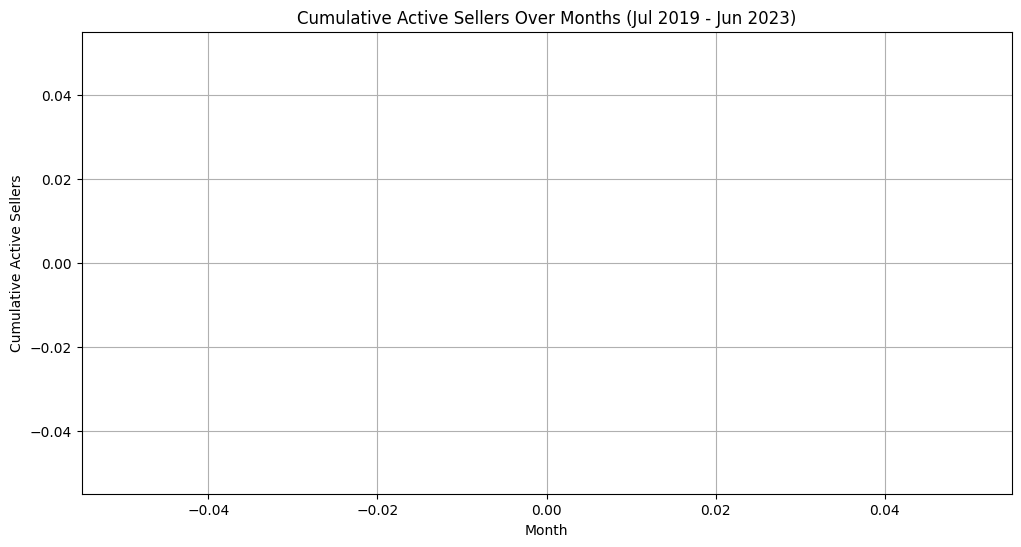

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 Temmuz ayından 2023 Haziran ayına kadar olan verileri seçme
df_selected = df[(df['Register Year'] >= 2019) & (df['Register Month'] >= 7) & (df['Register Year'] <= 2023) & (df['Register Month'] <= 6)]

# Her ayın başında kayıt olan üye sayısını hesaplama
monthly_new_sellers = df_selected.groupby(['Register Year', 'Register Month'])['Seller ID'].count().reset_index()

# Her ayın sonunda aktif üye sayısını hesaplama
monthly_cumulative_sellers = monthly_new_sellers.groupby(['Register Year', 'Register Month'])['Seller ID'].cumsum()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(monthly_cumulative_sellers, marker='o')
plt.xlabel('Month')
plt.ylabel('Cumulative Active Sellers')
plt.title('Cumulative Active Sellers Over Months (Jul 2019 - Jun 2023)')
plt.grid(True)
plt.xticks(range(len(monthly_cumulative_sellers)), [f'{year}-{month:02}' for year, month in zip(monthly_cumulative_sellers['Register Year'], monthly_cumulative_sellers['Register Month'])], rotation=45)
plt.tight_layout()
plt.show()

# 2023 Haziran ayındaki aktif üye sayısı
active_sellers_june_2023 = df[(df['Register Year'] == 2023) & (df['Register Month'] == 6) & (df['Status'] == 'Active')].shape[0]
print("2023 Haziran Ayı Aktif Üye Sayısı:", active_sellers_june_2023)


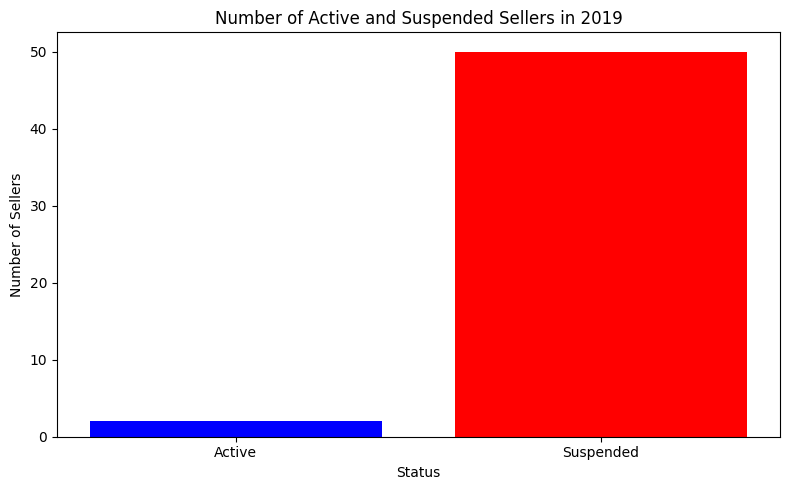

2019 Yılı Aktif Üye Sayısı: 2
2019 Yılı Pasif Üye Sayısı: 50


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# 2019 yılında aktif ve pasif üye sayılarını hesaplama
active_sellers_2019 = df[(df['Register Year'] == 2019) & (df['Status'] == 'Active')].shape[0]
suspended_sellers_2019 = df[(df['Register Year'] == 2019) & (df['Status'] == 'Suspended')].shape[0]

# Grafik çizimi
plt.figure(figsize=(8, 5))
plt.bar(['Active', 'Suspended'], [active_sellers_2019, suspended_sellers_2019], color=['blue', 'red'])
plt.xlabel('Status')
plt.ylabel('Number of Sellers')
plt.title('Number of Active and Suspended Sellers in 2019')
plt.tight_layout()
plt.show()

print("2019 Yılı Aktif Üye Sayısı:", active_sellers_2019)
print("2019 Yılı Pasif Üye Sayısı:", suspended_sellers_2019)


KeyError: (2019, '7.0')

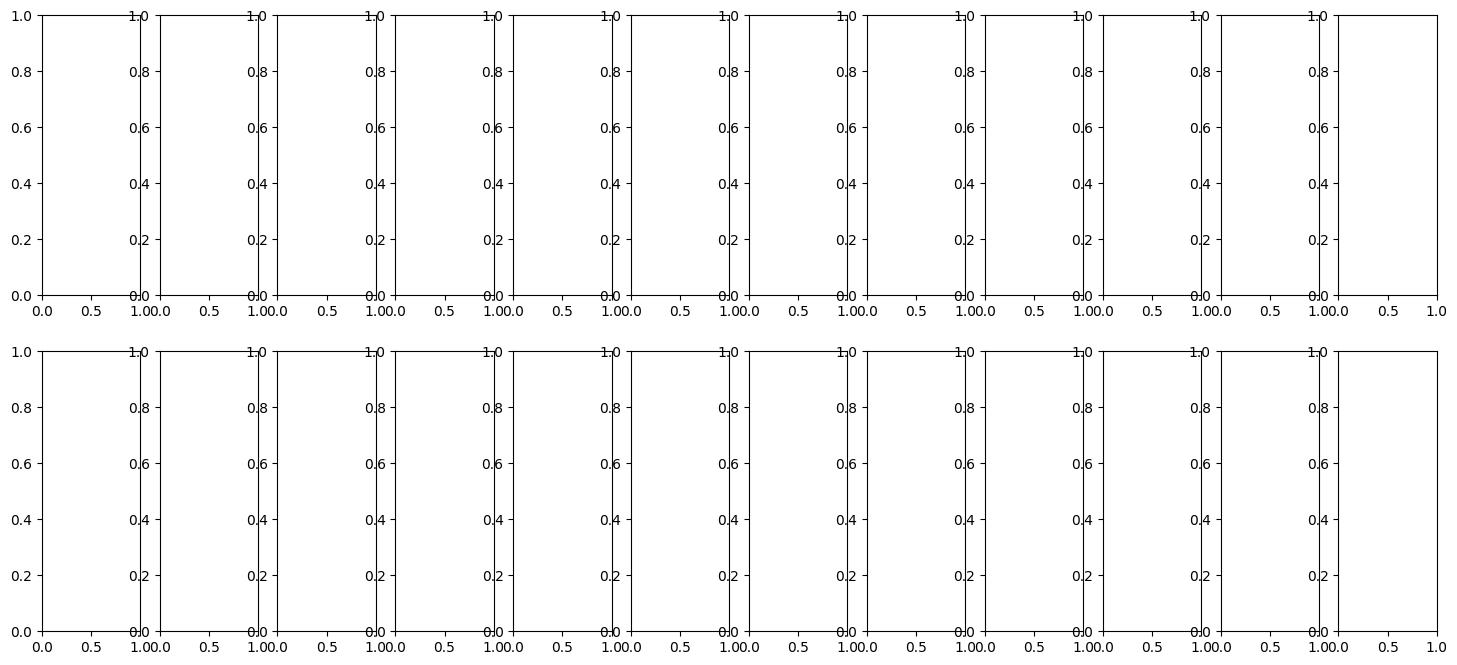

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Aylara göre aktif ve pasif üye sayılarını hesaplama
monthly_counts = df.groupby(['Register Year', 'Register Month', 'Status'])['Seller ID'].count().unstack()

# Grafik çizimi
months = [ '7.0', '8', '9', '10', '11', '12']
fig, axes = plt.subplots(nrows=2, ncols=12, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    month_data = monthly_counts.loc[(2019, months[i]), ['Active', 'Suspended']]
    month_data.plot(kind='bar', ax=ax, color=['blue', 'red'])
    ax.set_title(months[i])
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_ylabel('Number of Sellers')

plt.tight_layout()
plt.show()

for month in months:
    active_count = monthly_counts.loc[(2019, month), 'Active']
    suspended_count = monthly_counts.loc[(2019, month), 'Suspended']
    print(f"{month} Aktif Üye Sayısı:", active_count)
    print(f"{month} Pasif Üye Sayısı:", suspended_count)


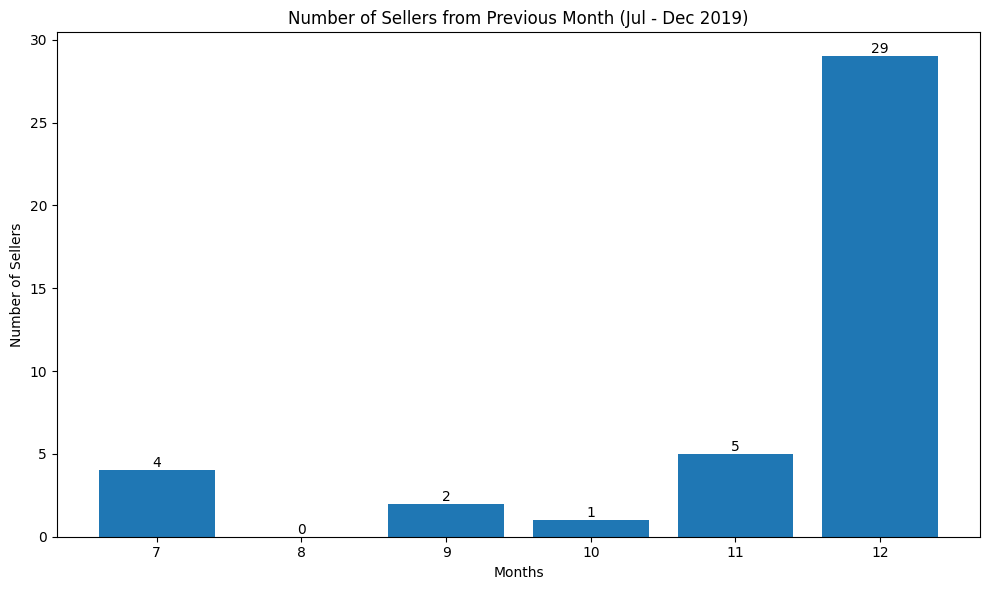

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Tüm ayların devir hesaplaması ve grafiği
all_months = ['7', '8', '9', '10', '11', '12']
devir_values = []

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # 7. ay için register ve suspend kolonlarını güncelle
    if month == '7':
        register_col = 'Register Month'
        suspend_col = 'Suspended Month'
        
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = df[(df['Register Year'] == 2019) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2019) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Jul - Dec 2019)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


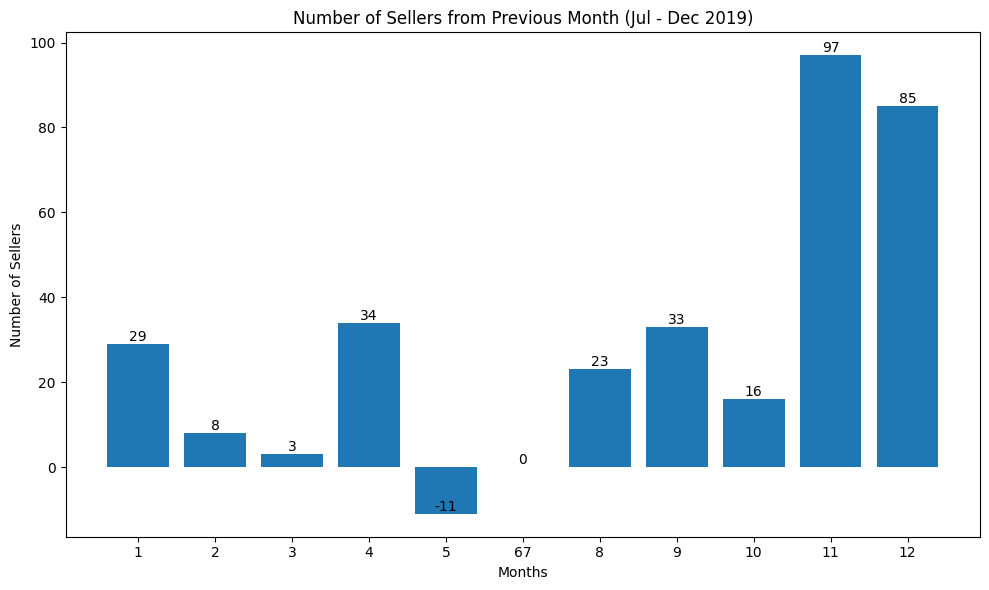

In [35]:
# Tüm ayların devir hesaplaması ve grafiği
all_months = ['1', '2', '3', '4', '5', '6''7', '8', '9', '10', '11', '12']
devir_values = []

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # 7. ay için register ve suspend kolonlarını güncelle
    if month == '1':
        register_col = 'Register Month'
        suspend_col = 'Suspended Month'
        
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = df[(df['Register Year'] == 2020) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2020) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Jul - Dec 2019)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()

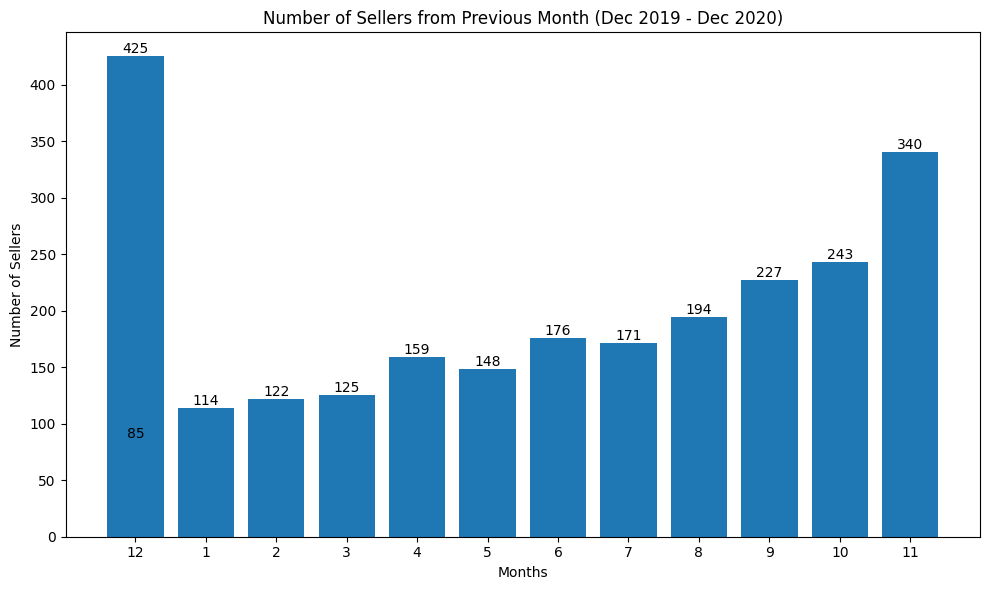

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Tüm ayların devir hesaplaması ve grafiği
all_months = ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
devir_values = []

# 2019 Aralık ayından devir başlangıcı
devir_start = 0

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # 1. ay için register ve suspend kolonlarını güncelle
    if month == '1':
        register_col = 'Register Month'
        suspend_col = 'Suspended Month'
        
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = devir_start + df[(df['Register Year'] == 2020) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2020) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)
    devir_start = devir  # Bir sonraki ay için devir başlangıcını güncelle

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Dec 2019 - Dec 2020)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


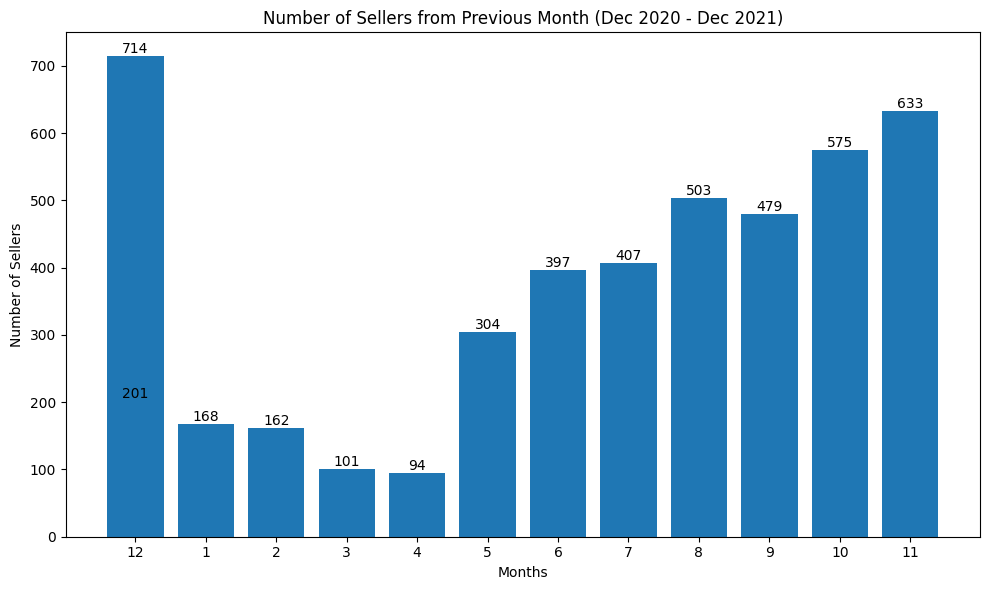

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Tüm ayların devir hesaplaması ve grafiği
all_months = ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
devir_values = []

# 2020 Aralık ayından devir başlangıcı
devir_start = df[(df['Register Year'] == 2020) & (df['Register Month'] == 12)].shape[0]

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # 1. ay için register ve suspend kolonlarını güncelle
    if month == '1':
        register_col = 'Register Month'
        suspend_col = 'Suspended Month'
        
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = devir_start + df[(df['Register Year'] == 2021) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2021) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)
    devir_start = devir  # Bir sonraki ay için devir başlangıcını güncelle

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Dec 2020 - Dec 2021)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


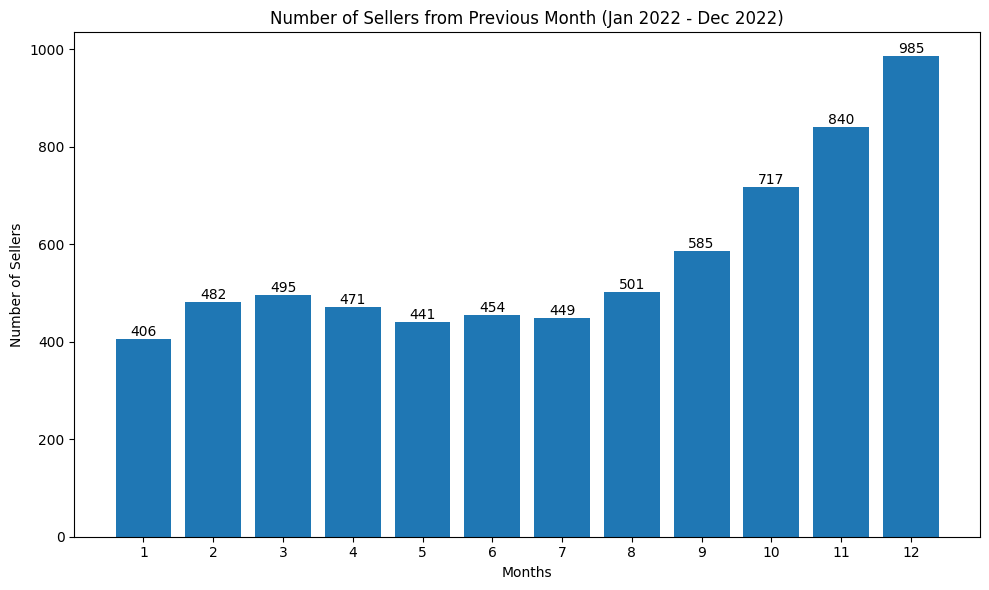

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Tüm ayların devir hesaplaması ve grafiği
all_months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
devir_values = []

# 2021 Aralık ayından devir başlangıcı
devir_start = df[(df['Register Year'] == 2021) & (df['Register Month'] == 12)].shape[0]

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # 1. ay için register ve suspend kolonlarını güncelle
    if month == '1':
        register_col = 'Register Month'
        suspend_col = 'Suspended Month'
        
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = devir_start + df[(df['Register Year'] == 2022) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2022) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)
    devir_start = devir  # Bir sonraki ay için devir başlangıcını güncelle

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Jan 2022 - Dec 2022)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


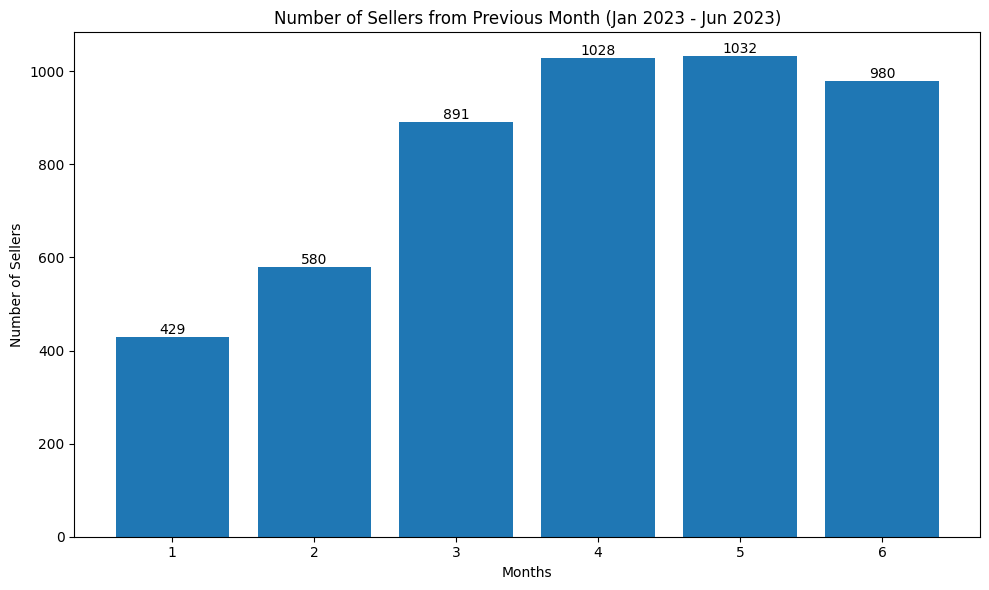

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users_With_New_Columns.xlsx'
df = pd.read_excel(file_path)

# Tüm ayların devir hesaplaması ve grafiği
all_months = ['1', '2', '3', '4', '5', '6']
devir_values = []

# 2022 Haziran ayından devir başlangıcı
devir_start = df[(df['Register Year'] == 2022) & (df['Register Month'] == 6)].shape[0]

for month in all_months:
    register_col = 'Register Month'
    suspend_col = 'Suspended Month'
    
    # Aydan devir hesaplaması
    register_month = int(month)
    suspend_month = int(month)
    devir = devir_start + df[(df['Register Year'] == 2023) & (df[register_col] == register_month)].shape[0] - \
            df[(df['Suspended Year'] == 2023) & (df[suspend_col] == suspend_month)].shape[0]
    
    devir_values.append(devir)
    devir_start = devir  # Bir sonraki ay için devir başlangıcını güncelle

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, devir_values)
plt.xlabel('Months')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers from Previous Month (Jan 2023 - Jun 2023)')
plt.tight_layout()

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


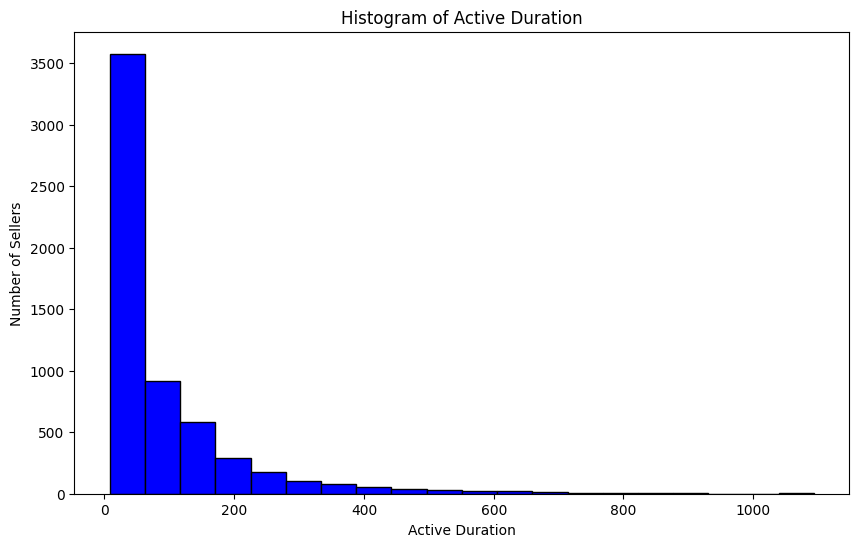

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Aktif kalma sürelerini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days


plt.figure(figsize=(10, 6))
plt.hist(df['Active Duration'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Active Duration')
plt.ylabel('Number of Sellers')
plt.title('Histogram of Active Duration')
plt.show()


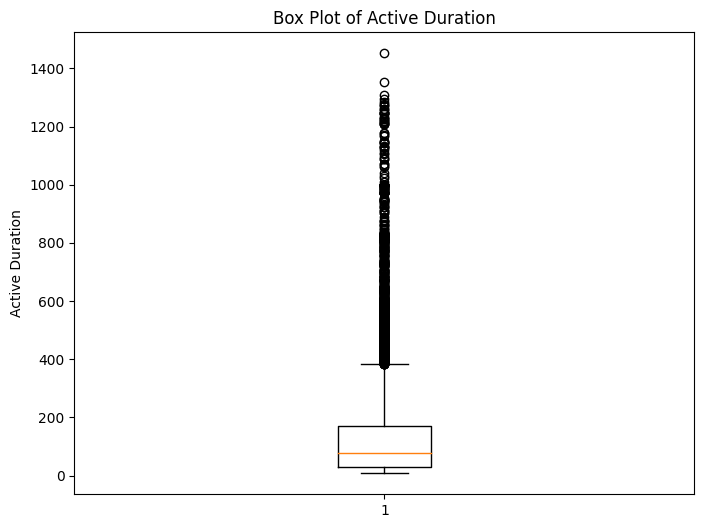

In [182]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Active Duration'])
plt.ylabel('Active Duration')
plt.title('Box Plot of Active Duration')
plt.show()


C:\Users\yucel\AppData\Local\Temp\ipykernel_12108\2337466201.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Active Duration'], shade=True)


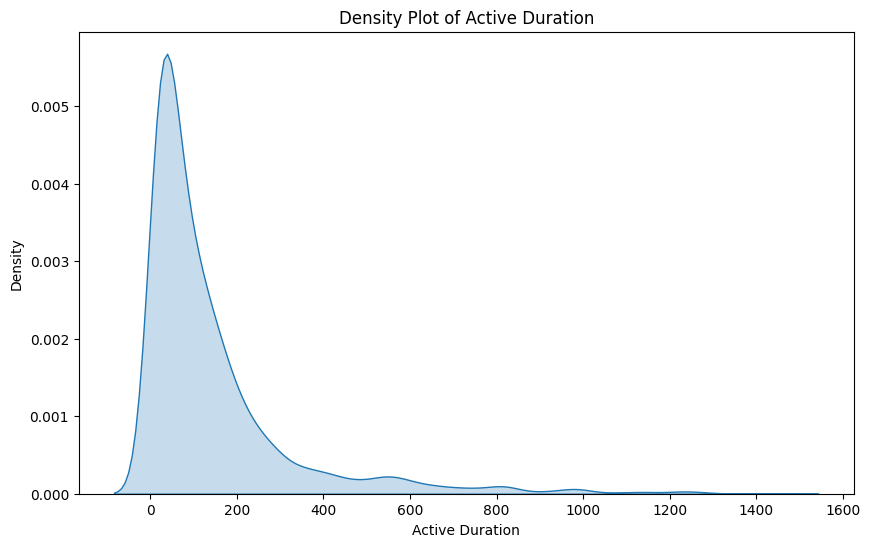

In [184]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Active Duration'], shade=True)
plt.xlabel('Active Duration')
plt.ylabel('Density')
plt.title('Density Plot of Active Duration')
plt.show()


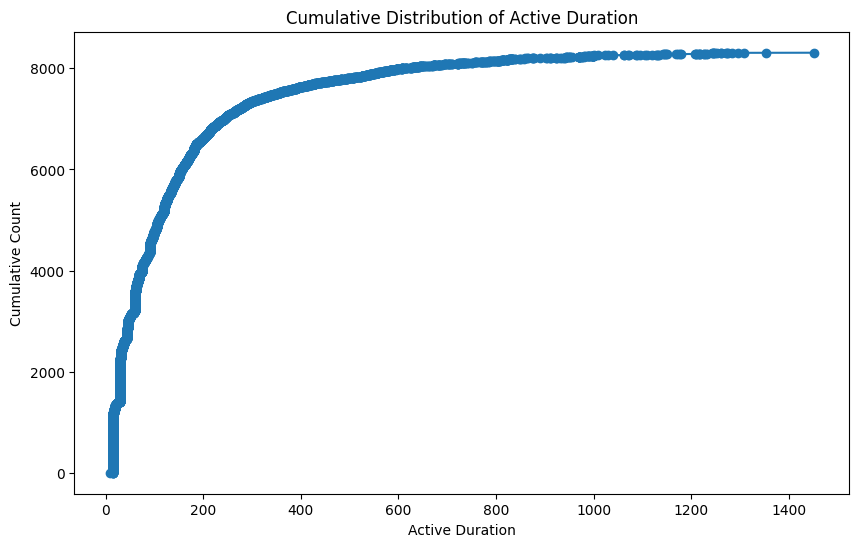

In [185]:
plt.figure(figsize=(10, 6))
n = len(df)
plt.plot(sorted(df['Active Duration']), range(1, n + 1), marker='o')
plt.xlabel('Active Duration')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Distribution of Active Duration')
plt.show()


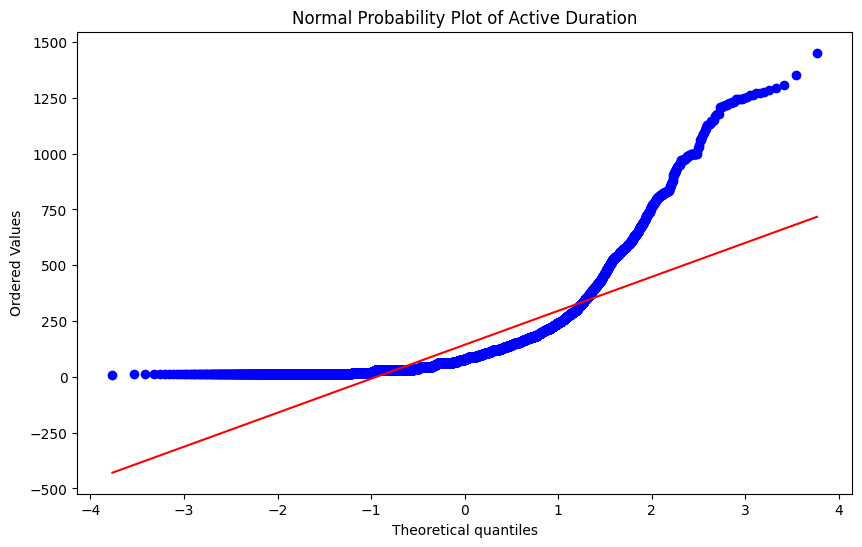

In [186]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df['Active Duration'], dist="norm", plot=plt)
plt.title('Normal Probability Plot of Active Duration')
plt.show()


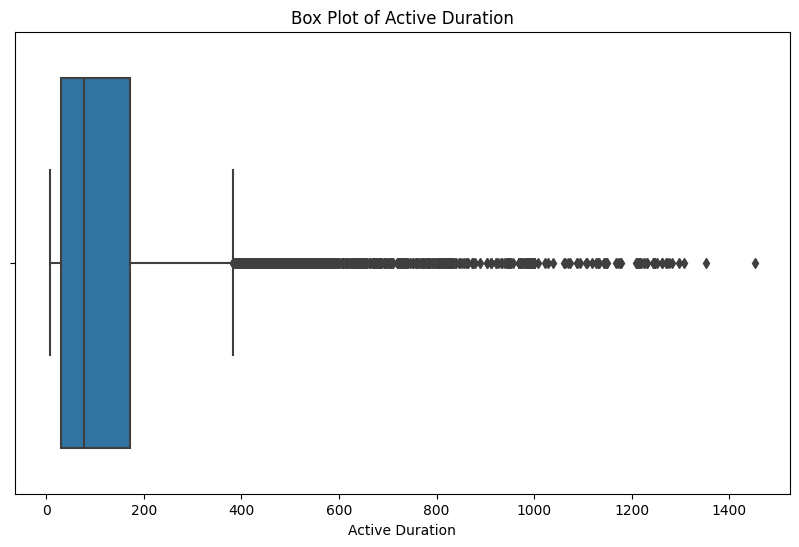

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Active Duration')
plt.xlabel('Active Duration')
plt.title('Box Plot of Active Duration')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Aktif kalma sürelerini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# NaN değerleri hesaplamaya dahil etmeyerek ortalama aktif kalma süresini hesapla
average_active_duration = df['Active Duration'].mean(skipna=True)

# Ortalama süreyi yazdır
print("Ortalama Aktif Kalma Süresi:", average_active_duration)




Ortalama Aktif Kalma Süresi: 91.96110456305776


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# Aktif kalma sürelerini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# NaN değerleri hesaplamaya dahil etmeyerek medyan aktif kalma süresini hesapla
median_active_duration = df['Active Duration'].median(skipna=True)

# Medyanı yazdır
print("Medyan Aktif Kalma Süresi:", median_active_duration)




Medyan Aktif Kalma Süresi: 45.0


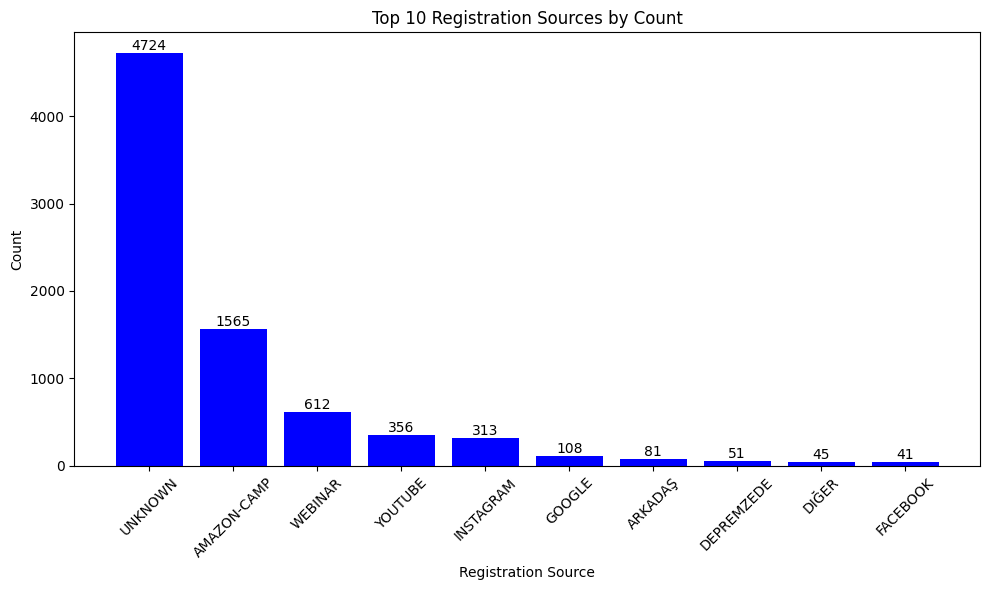

In [198]:


# "Registration Source" sutunundaki NaN değerleri 'UNKNOWN' olarak doldurma
df['Registration Source'].fillna('UNKNOWN', inplace=True)

# "Registration Source" sutunundaki verileri büyük harfle yazdırma
df['Registration Source'] = df['Registration Source'].str.upper()

# "Registration Source" sutunundaki verileri iki kelimeden fazlaysa ilk kelimeyi alma
df['Registration Source'] = df['Registration Source'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 1 else x)

# Verileri "Registration Source" sütununa göre gruplandırma ve sayma
grouped = df.groupby('Registration Source').size().reset_index(name='Count')

# En yüksek 10 değeri seçme
top_10 = grouped.nlargest(10, 'Count')

# Bar plot çizimi
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10['Registration Source'], top_10['Count'], color='blue')
plt.xlabel('Registration Source')
plt.ylabel('Count')
plt.title('Top 10 Registration Sources by Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Barların üzerine yazı eklenmesi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval), ha='center', va='bottom', fontsize=10)

# Grafiği gösterme
plt.show()


In [189]:
mean_duration = df['Active Duration'].mean()
median_duration = df['Active Duration'].median()
std_duration = df['Active Duration'].std()

print("Mean Active Duration:", mean_duration)
print("Median Active Duration:", median_duration)
print("Standard Deviation of Active Duration:", std_duration)


Mean Active Duration: 143.57985317126008
Median Active Duration: 78.0
Standard Deviation of Active Duration: 186.18000562723267


Sonuç olarak, ortalama aktif kalma süresi 143.58 gün, medyan süresi 78 gün ve standart sapma 186.18 gün olarak bulunmuş. Bu verilere dayanarak, platformdaki satıcıların aktif kalma sürelerinin genel olarak 78 günden daha uzun olduğunu söyleyebiliriz. Standart sapmanın yüksek olması, aktif kalma sürelerinin geniş bir dağılıma sahip olduğunu ve bazı satıcıların uzun süreli aktif kalma sürelerine sahip olduğunu gösteriyor olabilir.

       Seller ID  Active Duration  Total Account Count  Total Product Count  \
3590    Seller 6             1452                    5                    0   
3610   Seller 26             1353                   13                36042   
1724  Seller 106             1296                    8                26362   
3719  Seller 136             1276                    1                    0   
3722  Seller 139             1273                    1                    0   
3735  Seller 152             1262                    1                   17   
3753  Seller 170             1252                   13                    0   
3755  Seller 172             1248                    1                    0   
3782  Seller 199             1232                    1                 2195   
3792  Seller 209             1226                    1                    0   

      Total Income  Total Profit  
3590         16352          1567  
3610        509750         14102  
1724        222107       

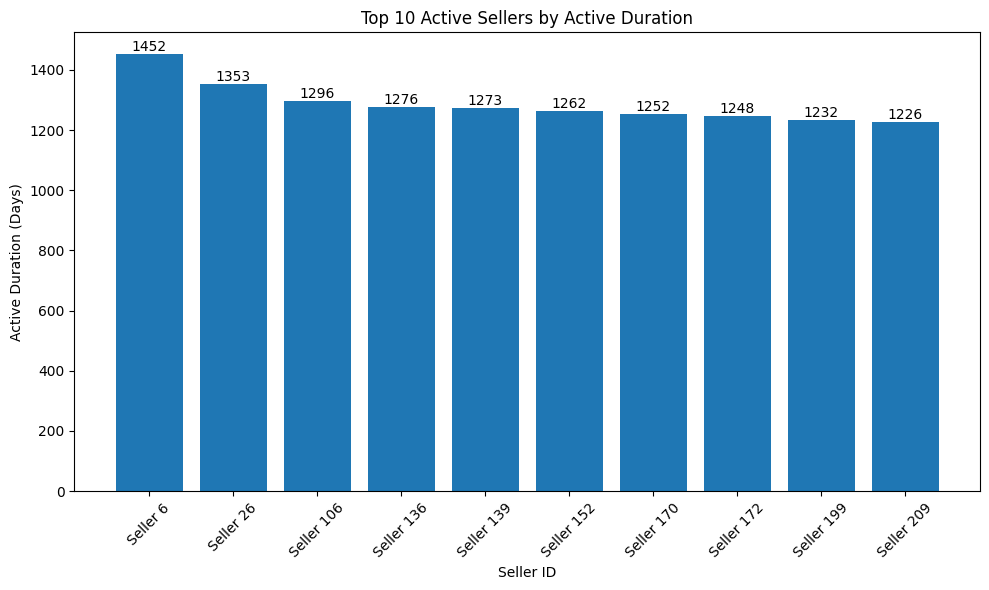

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)
# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Sadece "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# Aktif kalma süresine göre sıralama yapma ve en yüksek ilk onu seçme
top_active_sellers = active_sellers.nlargest(10, 'Active Duration')

# İlk on satıcının ilgili sütunlarıyla birlikte görüntüleme
print(top_active_sellers[['Seller ID', 'Active Duration', 'Total Account Count', 'Total Product Count', 'Total Income', 'Total Profit']])

# Çubuk grafik çizme
plt.figure(figsize=(10, 6))
plt.bar(top_active_sellers['Seller ID'], top_active_sellers['Active Duration'])
plt.xlabel('Seller ID')
plt.ylabel('Active Duration (Days)')
plt.title('Top 10 Active Sellers by Active Duration')
plt.xticks(rotation=45)
plt.tight_layout()

# Çubukların üzerine yazıları eklemek için
for index, row in top_active_sellers.iterrows():
    plt.text(row['Seller ID'], row['Active Duration'], str(row['Active Duration']), ha='center', va='bottom')

plt.show()


In [154]:
# Aktif kalma süresine göre sıralama yapma ve en düşük ilk onu seçme
lowest_active_sellers = active_sellers.nsmallest(10, 'Active Duration')

# En düşük ilk on satıcıyı görüntüleme
print(lowest_active_sellers[['Seller ID', 'Active Duration']])

        Seller ID  Active Duration
977   Seller 8305               57
978   Seller 8309               57
1016  Seller 8306               57
1480  Seller 8308               57
1598  Seller 8307               57
360   Seller 8304               58
976   Seller 8302               58
1479  Seller 8303               58
1597  Seller 8301               58
1648  Seller 8300               58


In [199]:
# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)
# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended" durumunda olan ve "Suspended Date" sütunu boş olan satıcıları seçme
suspended_without_date = df[(df['Status'] == 'Suspended' ) & df['Suspended Date'].isnull()]

# "Incomplete" durumunda olan ve "Suspended Date" sütunu boş olan satıcıları seçme
Incomplete_without_date = df[(df['Status'] == 'Incomplete') & df['Suspended Date'].isnull()]

# "Not Verified" durumunda olan ve "Suspended Date" sütunu boş olan satıcıları seçme
NotVerified_without_date = df[(df['Status'] == 'Not Verified') & df['Suspended Date'].isnull()]

# Seçilen satıcıların sayısını bulma
num_suspended_without_date = len(suspended_without_date)
num_Incomplete_without_date = len(Incomplete_without_date)
num_NotVerified_without_date = len(NotVerified_without_date)

# Seçilen satıcıların "Seller ID"lerini alma
suspended_seller_ids = suspended_without_date['Seller ID'].tolist()
incomplete_seller_ids = Incomplete_without_date['Seller ID'].tolist()
not_verified_seller_ids = NotVerified_without_date['Seller ID'].tolist()

# Sonuçları yazdırma
print("Number of Suspended Sellers without Suspended Date:", num_suspended_without_date)
print("Suspended Sellers without Suspended Date - Seller IDs:", suspended_seller_ids)
print("Number of Incomplete Sellers without Incomplete Date:", num_Incomplete_without_date)
print("Incomplete Sellers without Suspended Date - Seller IDs:", incomplete_seller_ids)
print("Number of Not Verified Sellers without NotVerified Date:", num_NotVerified_without_date)
print("Not Verified Sellers without Suspended Date - Seller IDs:", not_verified_seller_ids)


Number of Suspended Sellers without Suspended Date: 1
Suspended Sellers without Suspended Date - Seller IDs: ['Seller 125']
Number of Incomplete Sellers without Incomplete Date: 2
Incomplete Sellers without Suspended Date - Seller IDs: ['Seller 87', 'Seller 665']
Number of Not Verified Sellers without NotVerified Date: 18
Not Verified Sellers without Suspended Date - Seller IDs: ['Seller 4897', 'Seller 140', 'Seller 155', 'Seller 178', 'Seller 180', 'Seller 182', 'Seller 186', 'Seller 201', 'Seller 206', 'Seller 247', 'Seller 406', 'Seller 471', 'Seller 746', 'Seller 752', 'Seller 2511', 'Seller 3153', 'Seller 3648', 'Seller 4478']


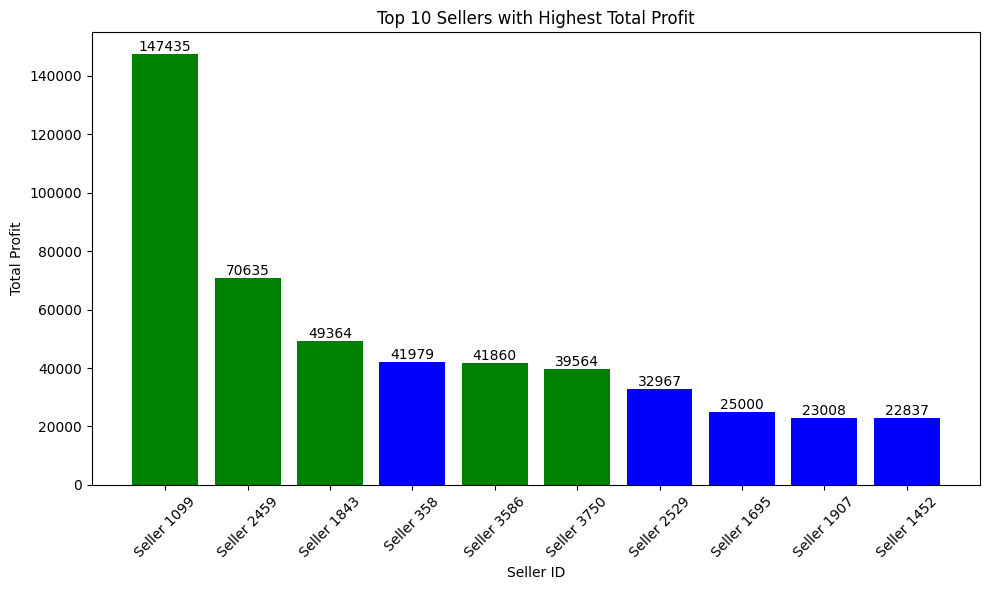

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# "Total Profit" değeri en yüksek olan ilk 10 satıcıyı seçme
top_profit_sellers = active_sellers.nlargest(10, 'Total Profit')

# Belirlediğiniz satıcılar
common_seller_ids = ['Seller 2459', 'Seller 1099', 'Seller 1843', 'Seller 860', 'Seller 3750', 'Seller 3586']

# Bar grafiği çizme
plt.figure(figsize=(10, 6))

# Belirlediğiniz satıcıları farklı renklerde çizim yapmak için renk listesi
colors = ['green' if seller_id in common_seller_ids else 'blue' for seller_id in top_profit_sellers['Seller ID']]

bars = plt.bar(top_profit_sellers['Seller ID'], top_profit_sellers['Total Profit'], color=colors)
plt.xlabel('Seller ID')
plt.ylabel('Total Profit')
plt.title('Top 10 Sellers with Highest Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()

# Barların üzerine yazı eklenmesi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Grafiği gösterme
plt.show()


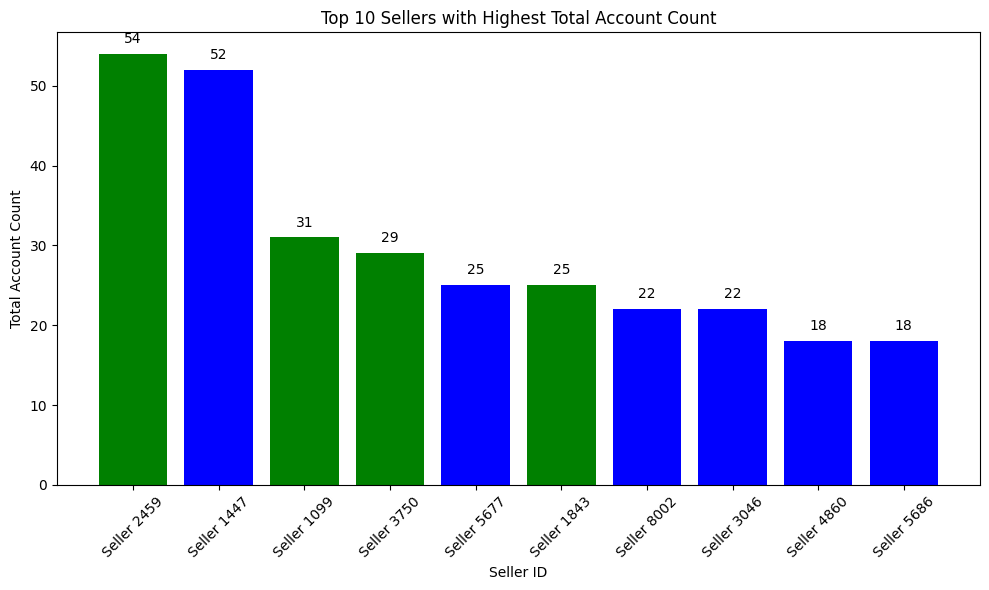

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# "Total Account Count" değeri en yüksek olan ilk 10 satıcıyı seçme
top_profit_sellers = active_sellers.nlargest(10, 'Total Account Count')

# Belirlediğiniz satıcılar
common_seller_ids = ['Seller 2459', 'Seller 1099', 'Seller 1843', 'Seller 860', 'Seller 3750', 'Seller 3586']

# Bar grafiği çizme
plt.figure(figsize=(10, 6))

# Belirlediğiniz satıcıları farklı renklerde çizim yapmak için renk listesi
colors = ['green' if seller_id in common_seller_ids else 'blue' for seller_id in top_profit_sellers['Seller ID']]

bars = plt.bar(top_profit_sellers['Seller ID'], top_profit_sellers['Total Account Count'], color=colors)
plt.xlabel('Seller ID')
plt.ylabel('Total Account Count')
plt.title('Top 10 Sellers with Highest Total Account Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Barların üzerine yazı eklenmesi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Grafiği gösterme
plt.show()

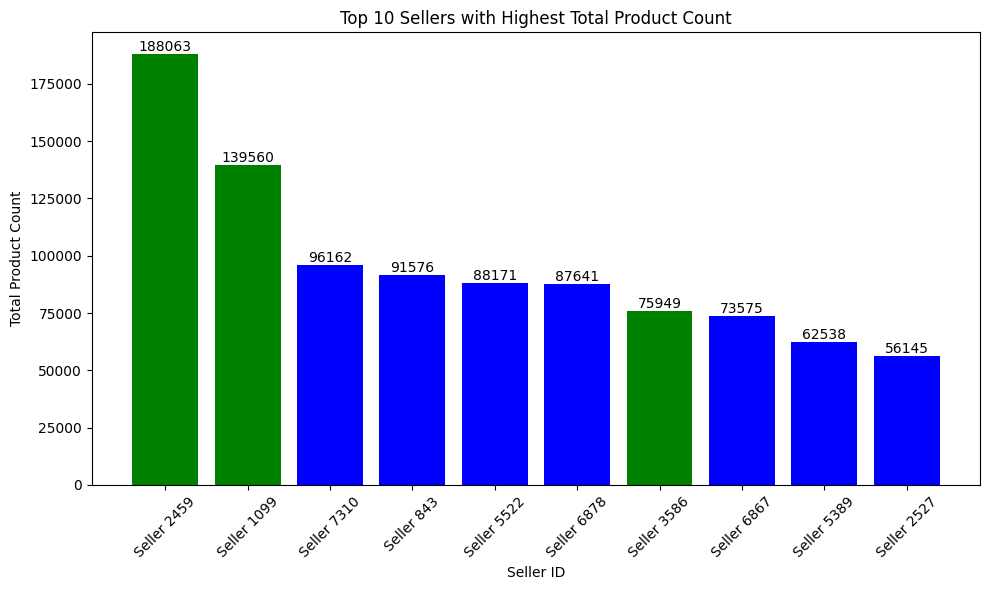

In [178]:
# "Total Product Count" değeri en yüksek olan ilk 10 satıcıyı seçme
top_profit_sellers = active_sellers.nlargest(10, 'Total Product Count')

# Belirlediğiniz satıcılar
common_seller_ids = ['Seller 2459', 'Seller 1099', 'Seller 1843', 'Seller 860', 'Seller 3750', 'Seller 3586']

# Bar grafiği çizme
plt.figure(figsize=(10, 6))

# Belirlediğiniz satıcıları farklı renklerde çizim yapmak için renk listesi
colors = ['green' if seller_id in common_seller_ids else 'blue' for seller_id in top_profit_sellers['Seller ID']]

bars = plt.bar(top_profit_sellers['Seller ID'], top_profit_sellers['Total Product Count'], color=colors)
plt.xlabel('Seller ID')
plt.ylabel('Total Product Count')
plt.title('Top 10 Sellers with Highest Total Product Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Barların üzerine yazı eklenmesi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Grafiği gösterme
plt.show()

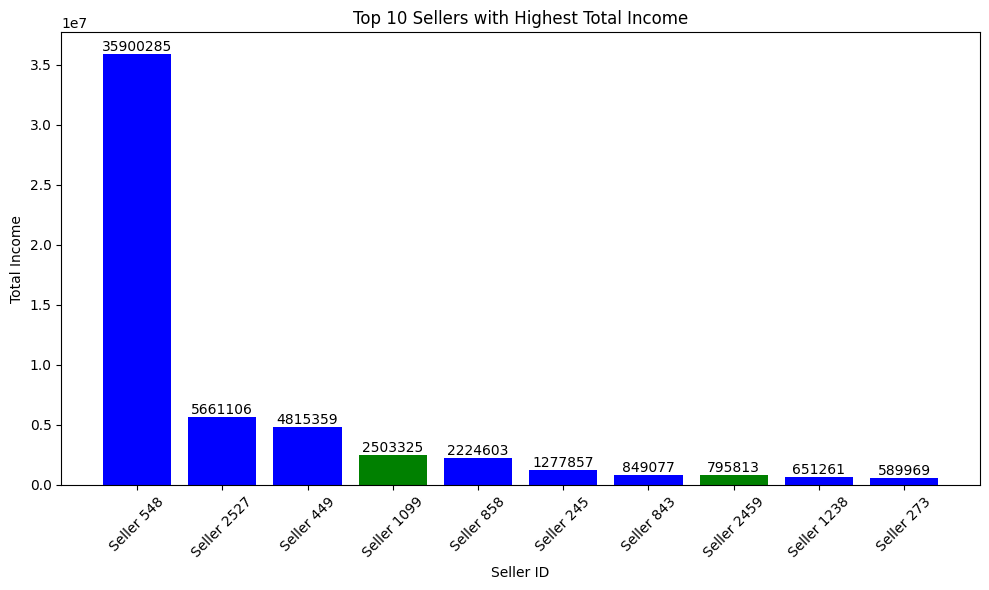

In [179]:
# "Total Income" değeri en yüksek olan ilk 10 satıcıyı seçme
top_profit_sellers = active_sellers.nlargest(10, 'Total Income')

# Belirlediğiniz satıcılar
common_seller_ids = ['Seller 2459', 'Seller 1099', 'Seller 1843', 'Seller 860', 'Seller 3750', 'Seller 3586']

# Bar grafiği çizme
plt.figure(figsize=(10, 6))

# Belirlediğiniz satıcıları farklı renklerde çizim yapmak için renk listesi
colors = ['green' if seller_id in common_seller_ids else 'blue' for seller_id in top_profit_sellers['Seller ID']]

bars = plt.bar(top_profit_sellers['Seller ID'], top_profit_sellers['Total Income'], color=colors)
plt.xlabel('Seller ID')
plt.ylabel('Total Income')
plt.title('Top 10 Sellers with Highest Total Income')
plt.xticks(rotation=45)
plt.tight_layout()

# Barların üzerine yazı eklenmesi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Grafiği gösterme
plt.show()

In [5]:
seller_1099_duration = df[df['Seller ID'] == 'Seller 1099']['Active Duration'].values[0]
seller_2459_duration = df[df['Seller ID'] == 'Seller 2459']['Active Duration'].values[0]

print("Seller 1099 Aktif Kalma Süresi:", seller_1099_duration)
print("Seller 2459 Aktif Kalma Süresi:", seller_2459_duration)


Seller 1099 Aktif Kalma Süresi: nan
Seller 2459 Aktif Kalma Süresi: nan


In [6]:
from datetime import datetime

# Bugünün tarihini alalım
current_date = pd.Timestamp(datetime.today().date())

# Aktif kalma süresini hesaplamak için fonksiyon
def calculate_active_duration(row):
    if pd.isnull(row['Suspended Date']):  # Eğer hâlâ aktifse
        return (current_date - row['Register Date']).days
    else:  # Askıya alındıysa
        return (row['Suspended Date'] - row['Register Date']).days

# Aktif kalma süresini hesaplayarak yeni bir sütun ekleyelim
df['Active Duration'] = df.apply(calculate_active_duration, axis=1)

# Seller 1099 ve Seller 2459'un aktif kalma sürelerini alalım
seller_1099_duration = df[df['Seller ID'] == 'Seller 1099']['Active Duration'].values[0]
seller_2459_duration = df[df['Seller ID'] == 'Seller 2459']['Active Duration'].values[0]

print("Seller 1099 Aktif Kalma Süresi:", seller_1099_duration)
print("Seller 2459 Aktif Kalma Süresi:", seller_2459_duration)


Seller 1099 Aktif Kalma Süresi: 823
Seller 2459 Aktif Kalma Süresi: 615


Correlation Matrix:
                     Total Account Count  Total Product Count  Total Income  \
Total Account Count             1.000000             0.540694      0.062816   
Total Product Count             0.540694             1.000000      0.056863   
Total Income                    0.062816             0.056863      1.000000   
Total Profit                    0.422873             0.590148      0.127127   

                     Total Profit  
Total Account Count      0.422873  
Total Product Count      0.590148  
Total Income             0.127127  
Total Profit             1.000000  


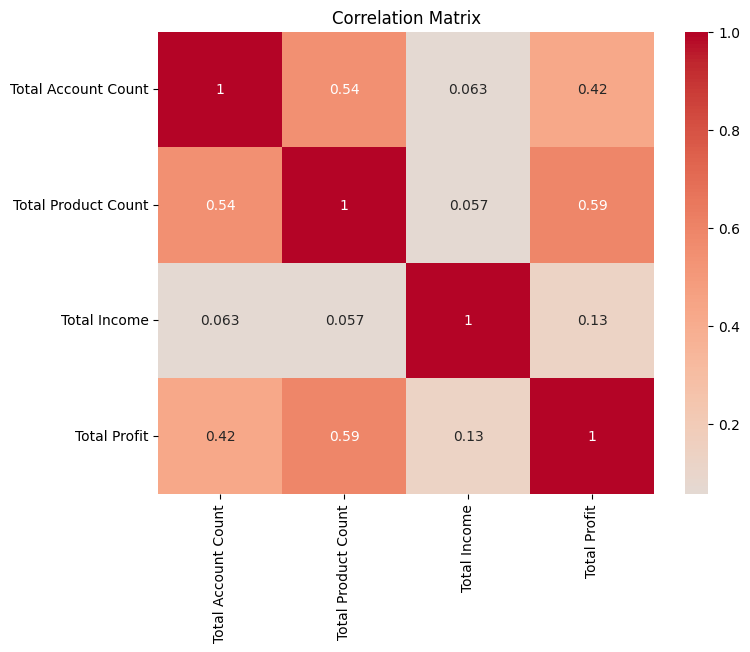

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# "Total Account Count", "Total Product Count", "Total Income", "Total Profit" sütunlarını seçme
selected_columns = ["Total Account Count", "Total Product Count", "Total Income", "Total Profit"]
selected_data = active_sellers[selected_columns]

# Korelasyon matrisini hesaplama
correlation_matrix = selected_data.corr()

# Korelasyon matrisini yazdırma
print("Correlation Matrix:")
print(correlation_matrix)

# Korelasyon matrisi grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


In [169]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# "Total Account Count", "Total Product Count", "Total Income", "Total Profit" sütunlarını seçme
selected_columns = ["Total Account Count", "Total Product Count", "Total Income", "Total Profit"]
selected_data = active_sellers[selected_columns]

# Korelasyon matrisini hesaplama
correlation_matrix = selected_data.corr()

# Korelasyon matrisini yazdırma
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Total Account Count  Total Product Count  Total Income  \
Total Account Count             1.000000             0.540694      0.062816   
Total Product Count             0.540694             1.000000      0.056863   
Total Income                    0.062816             0.056863      1.000000   
Total Profit                    0.422873             0.590148      0.127127   

                     Total Profit  
Total Account Count      0.422873  
Total Product Count      0.590148  
Total Income             0.127127  
Total Profit             1.000000  


"Total Account Count" ve "Total Product Count" sütunları arasındaki korelasyon değeri 0.540694'dir. Bu değer pozitif ve orta düzeyde bir ilişki olduğunu gösterir. Yani hesap sayısı ile ürün sayısı arasında bir bağlantı bulunmaktadır, ancak ilişki çok güçlü değildir.

"Total Account Count" ve "Total Profit" sütunları arasındaki korelasyon değeri 0.422873'tür. Bu da pozitif bir ilişkinin varlığını gösterir, ancak yine de orta düzeyde bir korelasyon vardır. Hesap sayısı ile toplam kar arasında bir bağlantı bulunmaktadır, ancak ilişki diğer sütunlardaki gibi çok güçlü değildir.

"Total Product Count" ve "Total Profit" sütunları arasındaki korelasyon değeri 0.590148'dir. Bu değer pozitif ve daha güçlü bir ilişki olduğunu gösterir. Ürün sayısı ile toplam kar arasında daha belirgin bir bağlantı bulunmaktadır.

"Total Income" ve "Total Profit" sütunları arasındaki korelasyon değeri 0.127127'dir. Bu değer nispeten düşük bir ilişki olduğunu gösterir. Gelir ile toplam kar arasındaki ilişki daha zayıftır.

Sonuç olarak, bu sütunlar arasında en güçlü ilişki "Total Product Count" ile "Total Profit" arasında bulunmaktadır. Diğer ilişkiler de daha az belirgin ve daha orta düzeydedir.

In [172]:
from itertools import combinations

# Top 10 Seller IDs in each category
top_account_count_ids = set(top_account_count['Seller ID'])
top_product_count_ids = set(top_product_count['Seller ID'])
top_income_ids = set(top_income['Seller ID'])
top_profit_ids = set(top_profit['Seller ID'])

# Find common seller IDs among three categories
common_seller_ids = (
    (top_account_count_ids & top_product_count_ids) |
    (top_account_count_ids & top_income_ids) |
    (top_account_count_ids & top_profit_ids) |
    (top_product_count_ids & top_income_ids) |
    (top_product_count_ids & top_profit_ids) |
    (top_income_ids & top_profit_ids)
)

# Display common seller IDs
print("Common Top Sellers Among Three Categories:")
print(common_seller_ids)


Common Top Sellers Among Three Categories:
{'Seller 2459', 'Seller 1099', 'Seller 1843', 'Seller 860', 'Seller 3750', 'Seller 3586'}


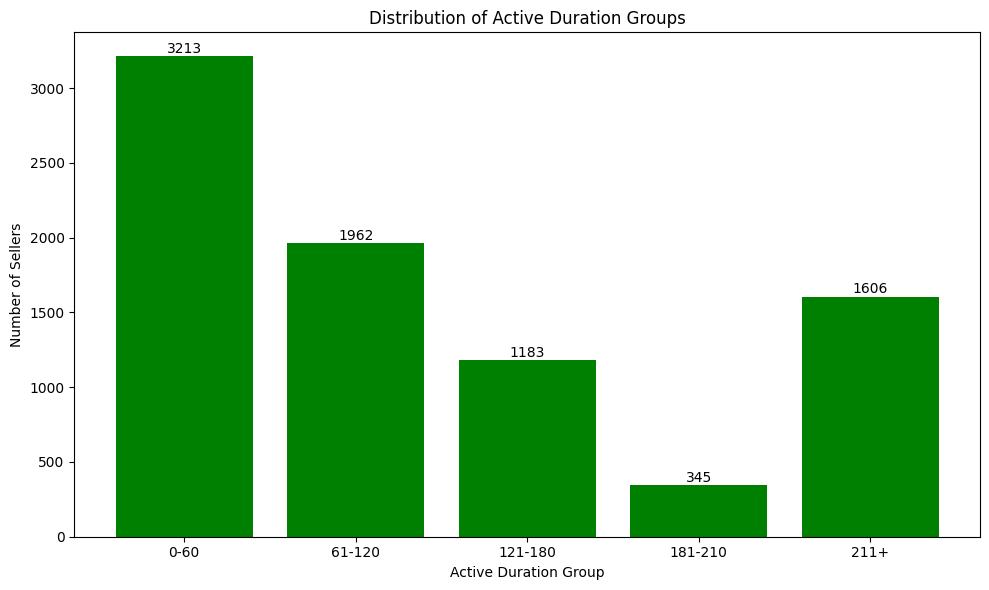

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Aktif kalma sürelerini gruplandırma
bins = [0, 60, 120, 180, 210, float('inf')]
labels = ['0-60', '61-120', '121-180', '181-210', '211+']
df['Active Duration Group'] = pd.cut(df['Active Duration'], bins=bins, labels=labels, right=False)

# Gruplara göre sayıları sayma
duration_group_counts = df['Active Duration Group'].value_counts().sort_index()

# Bar grafiği çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(duration_group_counts.index, duration_group_counts.values, color='green')
plt.xlabel('Active Duration Group')
plt.ylabel('Number of Sellers')
plt.title('Distribution of Active Duration Groups')

# Sayıları barların üzerine yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Grafiği gösterme
plt.show()


In [161]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Sadece "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# Aktif kalma süresi aynı olan satıcıları bulma
duplicate_active_durations = df[df.duplicated(subset=['Active Duration'], keep=False)]
duplicate_active_durations = duplicate_active_durations.sort_values(by='Active Duration')

# Aktif kalma süresine sahip satıcı sayısını yazdırma
for duration, count in duplicate_active_durations['Active Duration'].value_counts().items():
    print(f"Aktif kalma süresi {duration} gün olan {count} satıcı bulunmaktadır.")


Aktif kalma süresi 14 gün olan 940 satıcı bulunmaktadır.
Aktif kalma süresi 30 gün olan 855 satıcı bulunmaktadır.
Aktif kalma süresi 60 gün olan 314 satıcı bulunmaktadır.
Aktif kalma süresi 15 gün olan 247 satıcı bulunmaktadır.
Aktif kalma süresi 44 gün olan 193 satıcı bulunmaktadır.
Aktif kalma süresi 90 gün olan 156 satıcı bulunmaktadır.
Aktif kalma süresi 45 gün olan 122 satıcı bulunmaktadır.
Aktif kalma süresi 31 gün olan 117 satıcı bulunmaktadır.
Aktif kalma süresi 120 gün olan 94 satıcı bulunmaktadır.
Aktif kalma süresi 74 gün olan 84 satıcı bulunmaktadır.
Aktif kalma süresi 61 gün olan 71 satıcı bulunmaktadır.
Aktif kalma süresi 62 gün olan 68 satıcı bulunmaktadır.
Aktif kalma süresi 68 gün olan 57 satıcı bulunmaktadır.
Aktif kalma süresi 16 gün olan 54 satıcı bulunmaktadır.
Aktif kalma süresi 105 gün olan 52 satıcı bulunmaktadır.
Aktif kalma süresi 32 gün olan 51 satıcı bulunmaktadır.
Aktif kalma süresi 121 gün olan 46 satıcı bulunmaktadır.
Aktif kalma süresi 19 gün olan 45 sat

## mesafeli satış sözleşmesi 8. madde

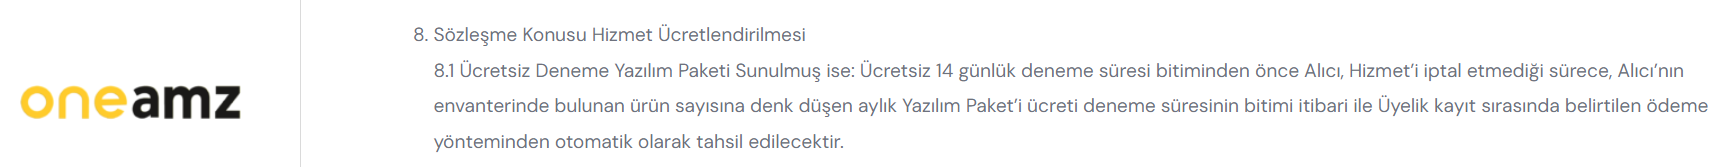

In [162]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Sadece "Active" durumundaki satıcıları seçme
active_sellers = df[df['Status'] == 'Active']

# Aktif kalma süresi aynı olan satıcıları bulma
duplicate_active_durations = df[df.duplicated(subset=['Active Duration'], keep=False)]
duplicate_active_durations = duplicate_active_durations.sort_values(by='Active Duration', ascending=False)

# Aktif kalma süresine sahip satıcı sayısını yazdırma
unique_durations = duplicate_active_durations['Active Duration'].unique()
for duration in unique_durations:
    count = len(duplicate_active_durations[duplicate_active_durations['Active Duration'] == duration])
    print(f"Aktif kalma süresi {duration} gün olan {count} satıcı bulunmaktadır.")


Aktif kalma süresi 1262 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 1245 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 1226 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 1210 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 1000 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 999 gün olan 5 satıcı bulunmaktadır.
Aktif kalma süresi 998 gün olan 3 satıcı bulunmaktadır.
Aktif kalma süresi 988 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 981 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 971 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 970 gün olan 5 satıcı bulunmaktadır.
Aktif kalma süresi 944 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 922 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 911 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 875 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 833 gün olan 2 satıcı bulunmaktadır.
Aktif kalma süresi 832 gün olan 3 satıcı bulunmaktadır.
Aktif kalma süresi 830 gün olan 3 satıcı bu

In [157]:


# Aktif kalma süresi 14 olan satıcıları seçme
active_duration_14 = df[df['Active Duration'] == 14]

# Sadece sıfırdan farklı değerlere sahip satıcıları ve askıya alınma nedenlerini seçme
filtered_sellers = active_duration_14[
    (active_duration_14['Total Product Count'] != 0) &
    (active_duration_14['Total Income'] != 0)
]

# Değerlere göre sıralama yapma
sorted_sellers = filtered_sellers.sort_values(by='Total Income', ascending=False)

# Seçili satıcıları listeleyerek değerlerini ve askıya alma nedenlerini yazdırma
for index, row in sorted_sellers.iterrows():
    seller_id = row['Seller ID']
    product_count = row['Total Product Count']
    income = row['Total Income']
    profit = row['Total Profit']
    suspension_reason = row['Cancellation Reason']
    
    print(f"Seller {seller_id} - Product Count: {product_count}, Total Income: {income}, profit: {profit}")
    print(f"Suspension Reason: {suspension_reason}")
    print("--------------------------")


Seller Seller 2766 - Product Count: 220, Total Income: 8925418, profit: 228
Suspension Reason: nan
--------------------------
Seller Seller 2669 - Product Count: 711, Total Income: 16670, profit: 116
Suspension Reason: nan
--------------------------
Seller Seller 2753 - Product Count: 973, Total Income: 6027, profit: 9
Suspension Reason: nan
--------------------------
Seller Seller 2760 - Product Count: 39, Total Income: 2512, profit: 0
Suspension Reason: nan
--------------------------
Seller Seller 3118 - Product Count: 386, Total Income: 774, profit: 36
Suspension Reason: nan
--------------------------
Seller Seller 3089 - Product Count: 2208, Total Income: 365, profit: 41
Suspension Reason: nan
--------------------------
Seller Seller 3120 - Product Count: 43, Total Income: 326, profit: 0
Suspension Reason: nan
--------------------------
Seller Seller 2688 - Product Count: 565, Total Income: 251, profit: 0
Suspension Reason: nan
--------------------------
Seller Seller 3094 - Produc

In [163]:


# Aktif kalma süresi 30 olan satıcıları seçme
active_duration_30 = df[df['Active Duration'] == 30]

# Sadece sıfırdan farklı değerlere sahip satıcıları ve askıya alınma nedenlerini seçme
filtered_sellers = active_duration_30[
    (active_duration_30['Total Product Count'] != 0) &
    (active_duration_30['Total Income'] != 0)
]

# Değerlere göre sıralama yapma
sorted_sellers = filtered_sellers.sort_values(by='Total Income', ascending=False)

# Seçili satıcıları listeleyerek değerlerini ve askıya alma nedenlerini yazdırma
for index, row in sorted_sellers.iterrows():
    seller_id = row['Seller ID']
    product_count = row['Total Product Count']
    income = row['Total Income']
    profit = row['Total Profit']
    suspension_reason = row['Cancellation Reason']
    
    print(f"Seller {seller_id} - Product Count: {product_count}, Total Income: {income}, profit: {profit}")
    print(f"Suspension Reason: {suspension_reason}")
    print("--------------------------")


Seller Seller 6174 - Product Count: 7304, Total Income: 13013, profit: 1935
Suspension Reason: could_not_sell
--------------------------
Seller Seller 7806 - Product Count: 2201, Total Income: 2302, profit: 380
Suspension Reason: amazon_suspended
--------------------------
Seller Seller 5994 - Product Count: 2491, Total Income: 2139, profit: 271
Suspension Reason: nan
--------------------------
Seller Seller 7072 - Product Count: 117, Total Income: 2064, profit: 0
Suspension Reason: could_not_sell
--------------------------
Seller Seller 4380 - Product Count: 2246, Total Income: 2042, profit: 226
Suspension Reason: nan
--------------------------
Seller Seller 6469 - Product Count: 2379, Total Income: 1759, profit: 112
Suspension Reason: nan
--------------------------
Seller Seller 7361 - Product Count: 955, Total Income: 1358, profit: 66
Suspension Reason: capital_problem
--------------------------
Seller Seller 7417 - Product Count: 1843, Total Income: 1300, profit: 139
Suspension Rea

In [164]:

# Aktif kalma süresi 60 olan satıcıları seçme
active_duration_60 = df[df['Active Duration'] == 60]

# Sadece sıfırdan farklı değerlere sahip satıcıları ve askıya alınma nedenlerini seçme
filtered_sellers = active_duration_60[
    (active_duration_60['Total Product Count'] != 0) &
    (active_duration_60['Total Income'] != 0)
]

# Değerlere göre sıralama yapma
sorted_sellers = filtered_sellers.sort_values(by='Total Income', ascending=False)

# Seçili satıcıları listeleyerek değerlerini ve askıya alma nedenlerini yazdırma
for index, row in sorted_sellers.iterrows():
    seller_id = row['Seller ID']
    product_count = row['Total Product Count']
    income = row['Total Income']
    profit = row['Total Profit']
    suspension_reason = row['Cancellation Reason']
    
    print(f"Seller {seller_id} - Product Count: {product_count}, Total Income: {income}, profit: {profit}")
    print(f"Suspension Reason: {suspension_reason}")
    print("--------------------------")

Seller Seller 6207 - Product Count: 3367, Total Income: 50267, profit: 5238
Suspension Reason: gave_up_not_interested_not_have_time
--------------------------
Seller Seller 3424 - Product Count: 2507, Total Income: 12708, profit: 438
Suspension Reason: nan
--------------------------
Seller Seller 7590 - Product Count: 3239, Total Income: 6871, profit: 954
Suspension Reason: gave_up_not_interested_not_have_time
--------------------------
Seller Seller 6493 - Product Count: 3610, Total Income: 6282, profit: 1447
Suspension Reason: could_not_sell
--------------------------
Seller Seller 6923 - Product Count: 1319, Total Income: 4374, profit: 425
Suspension Reason: consultant_problem
--------------------------
Seller Seller 7160 - Product Count: 18360, Total Income: 3867, profit: 562
Suspension Reason: capital_problem
--------------------------
Seller Seller 6896 - Product Count: 84, Total Income: 3723, profit: 327
Suspension Reason: capital_problem
--------------------------
Seller Seller

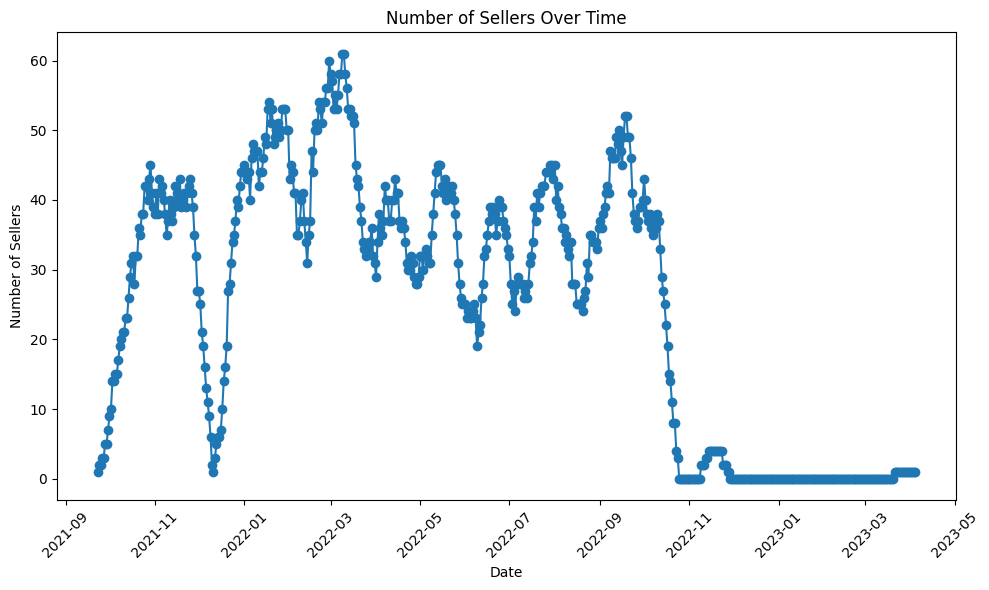

In [46]:


# Aktif kalma süresi 14 olan satıcıları seçme
active_duration_14 = df[df['Active Duration'] == 14]

# Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
date_series = pd.date_range(start=active_duration_14['Register Date'].min(), end=active_duration_14['Suspended Date'].max(), freq='D')
seller_counts = []

for date in date_series:
    count = ((active_duration_14['Register Date'] <= date) & (date <= active_duration_14['Suspended Date'])).sum()
    seller_counts.append(count)

# Tarih serisi grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(date_series, seller_counts, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## mesafeli satış sözleşmesi 8. madde

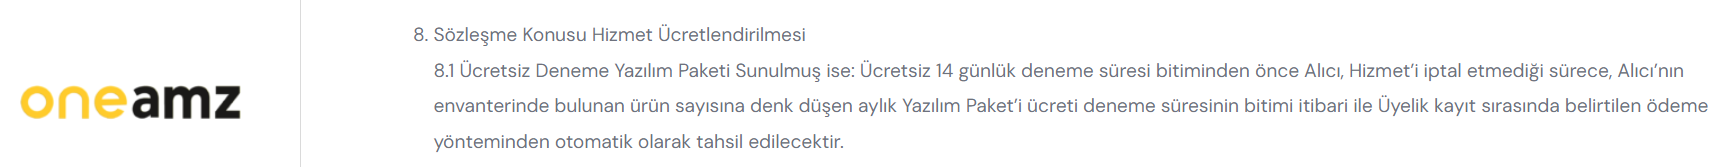

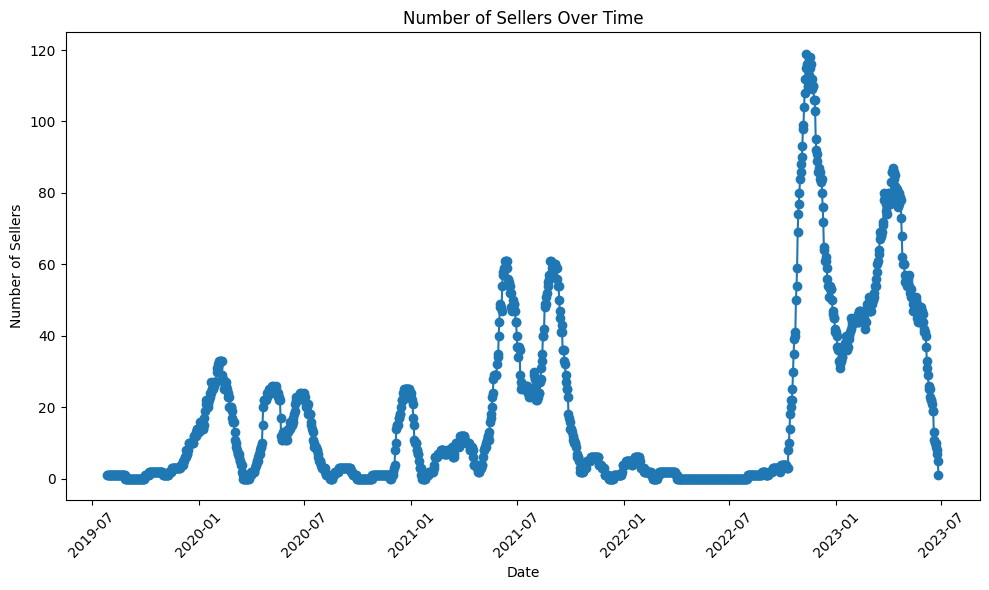

In [48]:
# Aktif kalma süresi 30 olan satıcıları seçme
active_duration_30 = df[df['Active Duration'] == 30]

# Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
date_series = pd.date_range(start=active_duration_30['Register Date'].min(), end=active_duration_30['Suspended Date'].max(), freq='D')
seller_counts = []

for date in date_series:
    count = ((active_duration_30['Register Date'] <= date) & (date <= active_duration_30['Suspended Date'])).sum()
    seller_counts.append(count)

# Tarih serisi grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(date_series, seller_counts, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

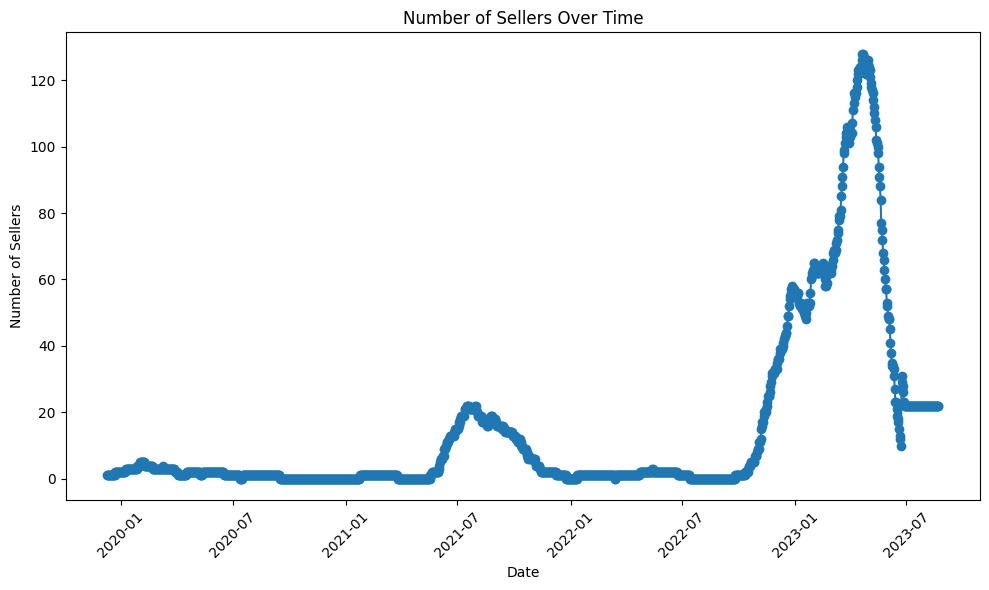

In [50]:
# Aktif kalma süresi 60 olan satıcıları seçme
active_duration_60 = df[df['Active Duration'] == 60]

# Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
date_series = pd.date_range(start=active_duration_60['Register Date'].min(), end=active_duration_60['Suspended Date'].max(), freq='D')
seller_counts = []

for date in date_series:
    count = ((active_duration_60['Register Date'] <= date) & (date <= active_duration_60['Suspended Date'])).sum()
    seller_counts.append(count)

# Tarih serisi grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(date_series, seller_counts, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

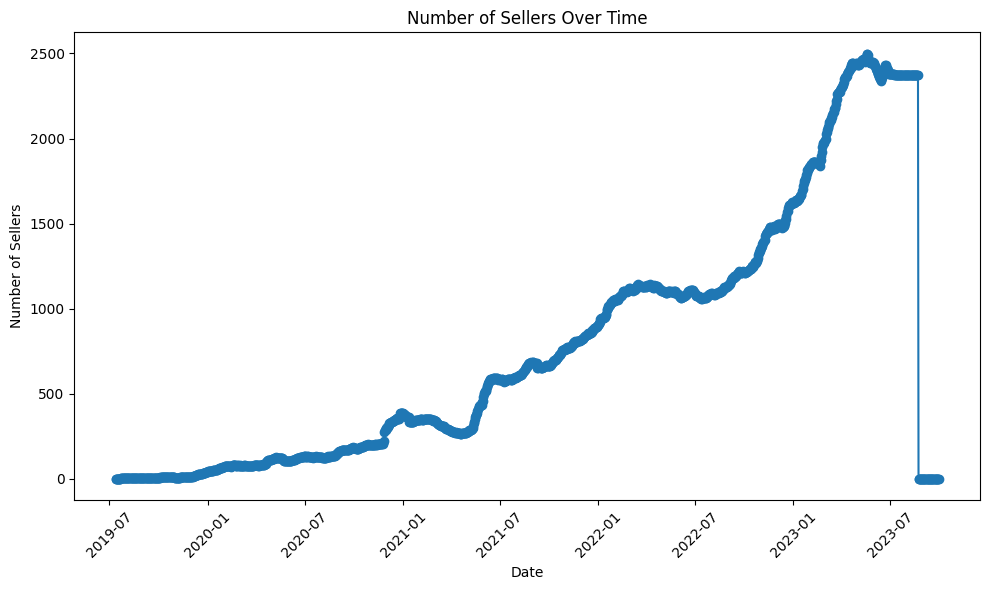

In [56]:


# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
date_series = pd.date_range(start=df['Register Date'].min(), end=df['Suspended Date'].max(), freq='D')
seller_counts = []

for date in date_series:
    count = ((df['Register Date'] <= date) & (date <= df['Suspended Date'])).sum()
    seller_counts.append(count)

# Tarih serisi grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(date_series, seller_counts, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


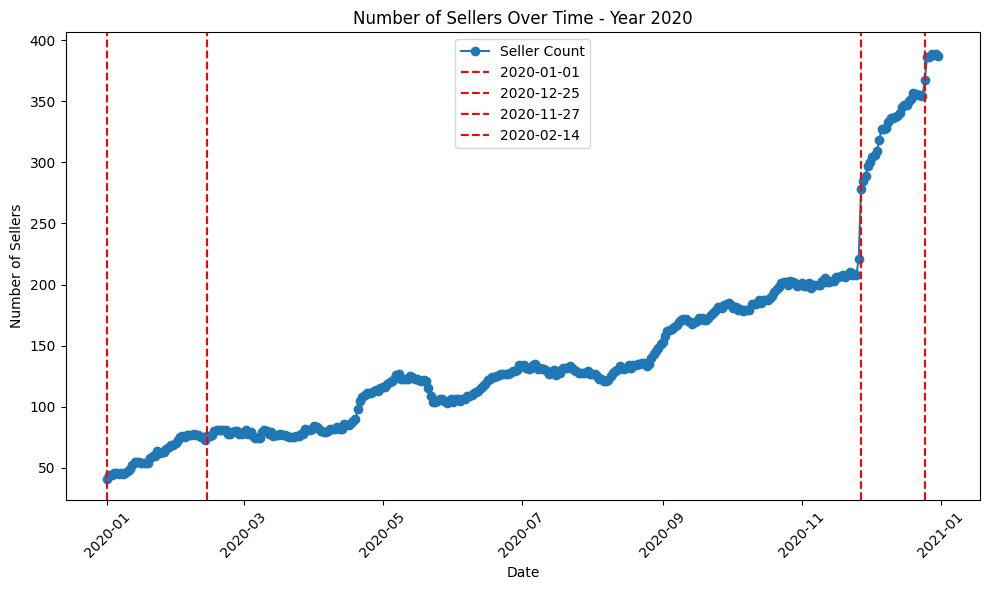

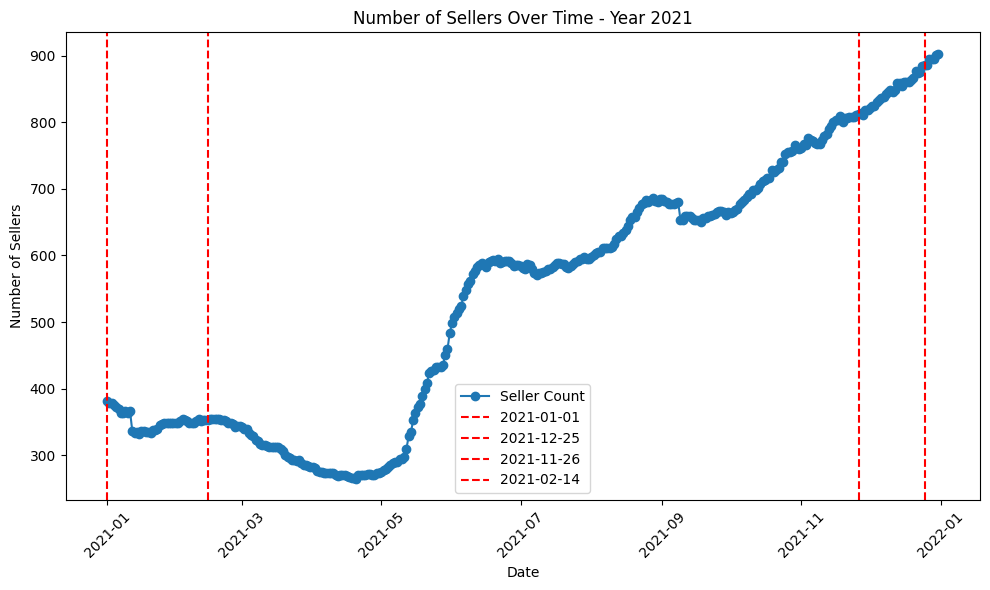

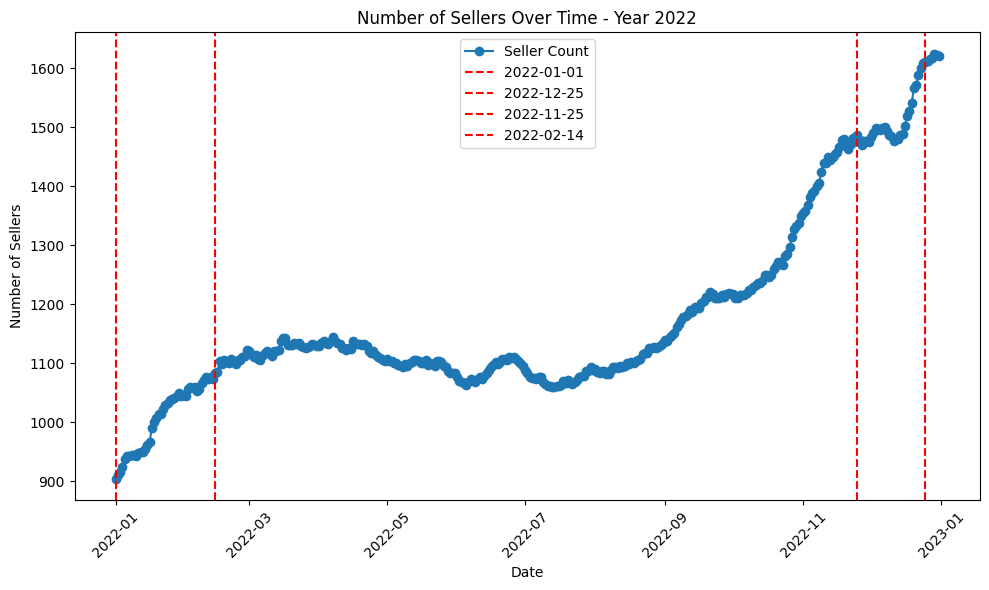

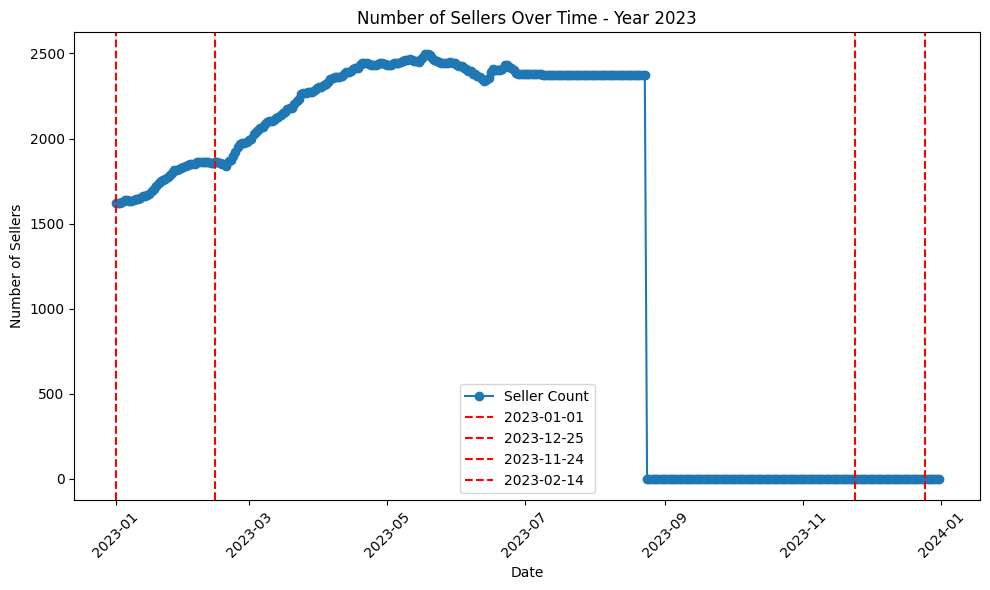

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Önemli tarihleri belirle (2020-2023 yılları)
special_dates = [pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-25'), pd.Timestamp('2020-11-27'), pd.Timestamp('2020-02-14'),
                 pd.Timestamp('2021-01-01'), pd.Timestamp('2021-12-25'), pd.Timestamp('2021-11-26'), pd.Timestamp('2021-02-14'),
                 pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-25'), pd.Timestamp('2022-11-25'), pd.Timestamp('2022-02-14'),
                 pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-25'), pd.Timestamp('2023-11-24'), pd.Timestamp('2023-02-14')]

# Önemli tarihlerin olduğu yılları ayırma
years = set(date.year for date in special_dates)

# Her yıl için grafik oluşturma
for year in years:
    plt.figure(figsize=(10, 6))
    plt.title(f'Number of Sellers Over Time - Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Sellers')
    plt.xticks(rotation=45)

    # Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
    start_date = pd.Timestamp(f'{year}-01-01')
    end_date = pd.Timestamp(f'{year}-12-31')
    date_series = pd.date_range(start=start_date, end=end_date, freq='D')
    seller_counts = []

    for date in date_series:
        count = ((df['Register Date'] <= date) & (date <= df['Suspended Date'])).sum()
        seller_counts.append(count)

    plt.plot(date_series, seller_counts, marker='o', label='Seller Count')

    # Önemli günleri grafikte gösterme
    for date in special_dates:
        if date.year == year:
            plt.axvline(x=date, color='red', linestyle='--', label=str(date.date()))

    plt.legend()
    plt.tight_layout()
    plt.show()

In [55]:


for date in date_series:
    count = ((df['Register Date'] <= date) & (date <= df['Suspended Date'])).sum()
    seller_counts.append(count)



# Yıl ve ay bazında satıcı kayıt sayılarını yazdırma
for year in range(df['Register Date'].min().year, df['Suspended Date'].max().year + 1):
    for month in range(1, 13):
        count = ((df['Register Date'].dt.year == year) & (df['Register Date'].dt.month == month)).sum()
        print(f"{year} yılı {month}. ayında {count} seller kayıt olmuştur.")


2019 yılı 1. ayında 0 seller kayıt olmuştur.
2019 yılı 2. ayında 0 seller kayıt olmuştur.
2019 yılı 3. ayında 0 seller kayıt olmuştur.
2019 yılı 4. ayında 0 seller kayıt olmuştur.
2019 yılı 5. ayında 0 seller kayıt olmuştur.
2019 yılı 6. ayında 0 seller kayıt olmuştur.
2019 yılı 7. ayında 4 seller kayıt olmuştur.
2019 yılı 8. ayında 1 seller kayıt olmuştur.
2019 yılı 9. ayında 2 seller kayıt olmuştur.
2019 yılı 10. ayında 4 seller kayıt olmuştur.
2019 yılı 11. ayında 6 seller kayıt olmuştur.
2019 yılı 12. ayında 35 seller kayıt olmuştur.
2020 yılı 1. ayında 46 seller kayıt olmuştur.
2020 yılı 2. ayında 42 seller kayıt olmuştur.
2020 yılı 3. ayında 50 seller kayıt olmuştur.
2020 yılı 4. ayında 55 seller kayıt olmuştur.
2020 yılı 5. ayında 28 seller kayıt olmuştur.
2020 yılı 6. ayında 52 seller kayıt olmuştur.
2020 yılı 7. ayında 34 seller kayıt olmuştur.
2020 yılı 8. ayında 52 seller kayıt olmuştur.
2020 yılı 9. ayında 73 seller kayıt olmuştur.
2020 yılı 10. ayında 59 seller kayıt olmuş

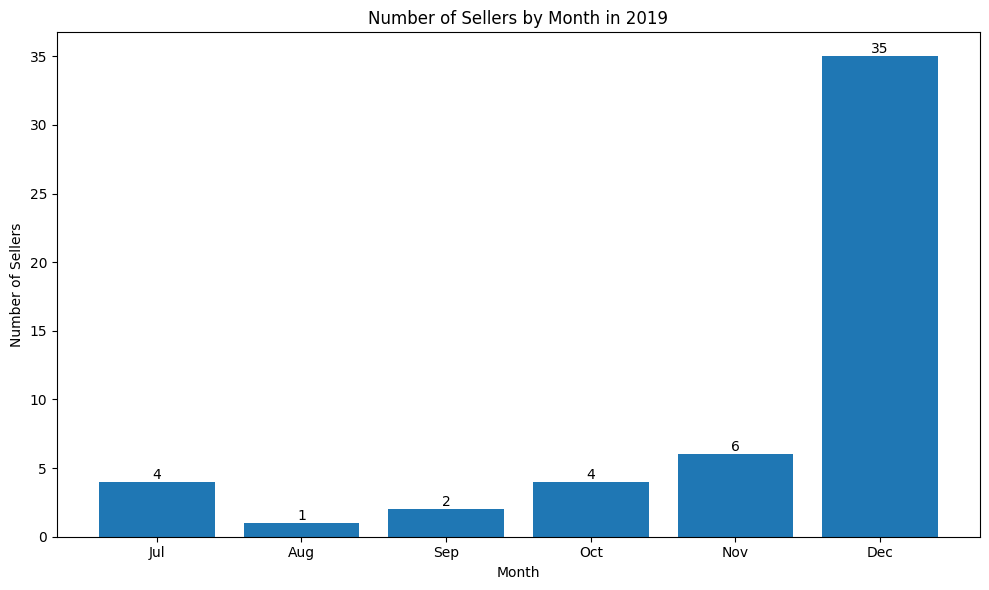

In [64]:


# Sadece 2019 yılı verilerini seçme
df_2019 = df[df['Year'] == 2019]

# Aylara göre satıcı sayılarını hesaplama
monthly_counts = df_2019.groupby('Month')['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by Month in 2019')
plt.xticks(monthly_counts.index, [ 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


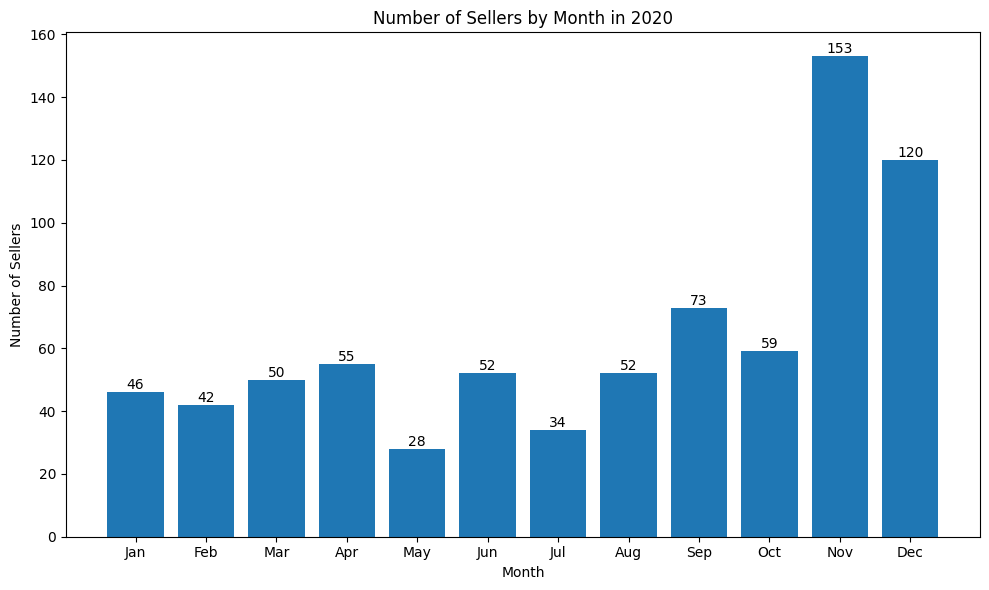

In [65]:


# Sadece 2020 yılı verilerini seçme
df_2020 = df[df['Year'] == 2020]

# Aylara göre satıcı sayılarını hesaplama
monthly_counts = df_2020.groupby('Month')['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by Month in 2020')
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


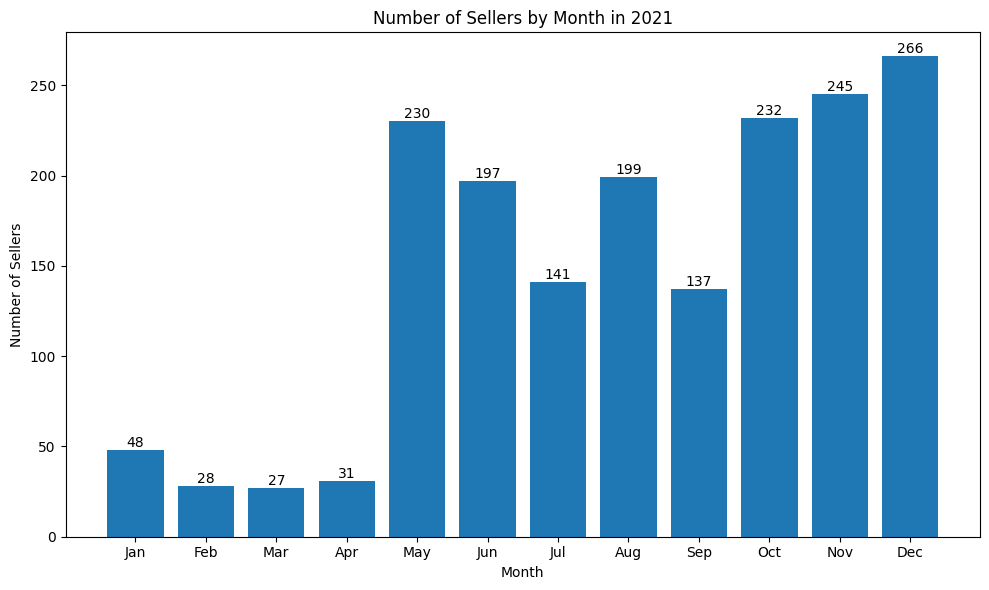

In [66]:
# Sadece 2021 yılı verilerini seçme
df_2021 = df[df['Year'] == 2021]

# Aylara göre satıcı sayılarını hesaplama
monthly_counts = df_2021.groupby('Month')['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by Month in 2021')
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

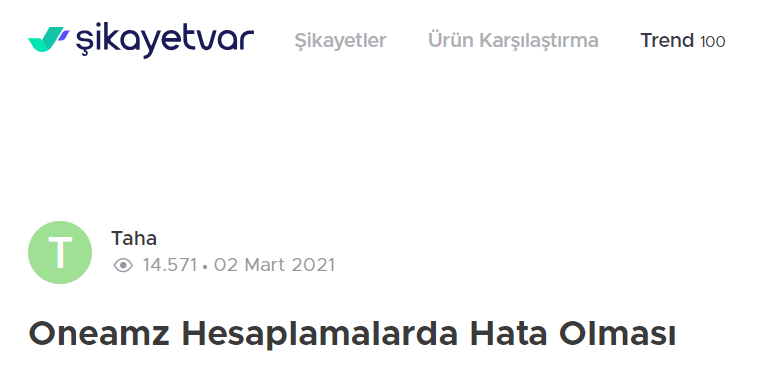

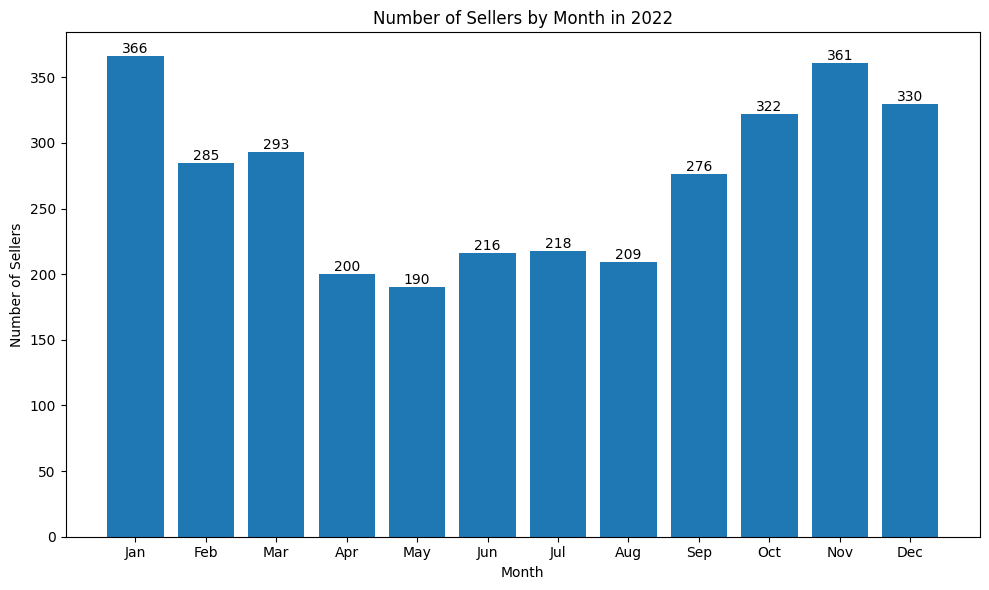

In [67]:
# Sadece 2022 yılı verilerini seçme
df_2022 = df[df['Year'] == 2022]

# Aylara göre satıcı sayılarını hesaplama
monthly_counts = df_2022.groupby('Month')['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by Month in 2022')
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

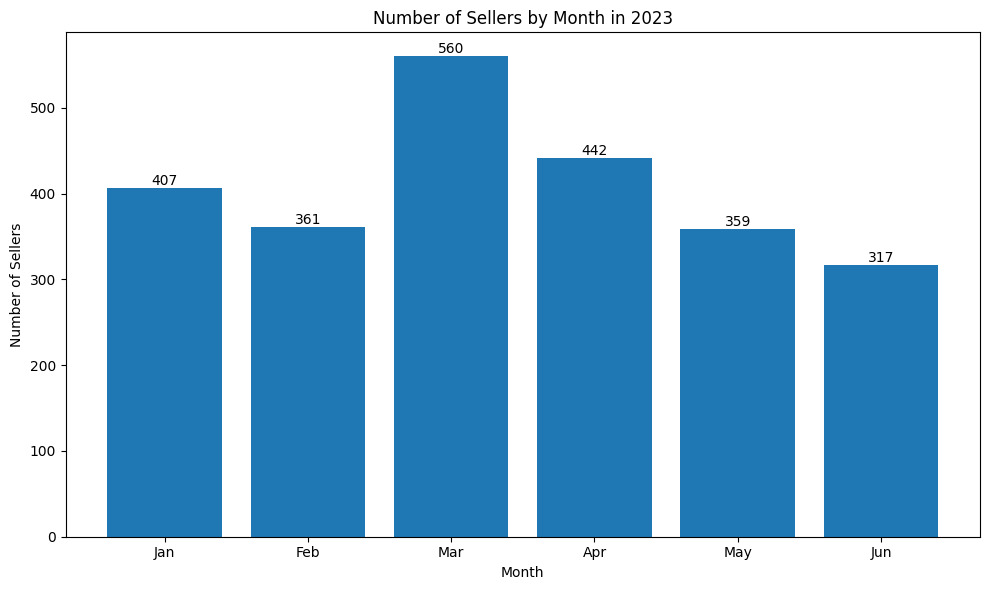

In [69]:
# Sadece 2023 yılı verilerini seçme
df_2023 = df[df['Year'] == 2023]

# Aylara göre satıcı sayılarını hesaplama
monthly_counts = df_2023.groupby('Month')['Seller ID'].count()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by Month in 2023')
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Çubukların üzerine sayıları yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

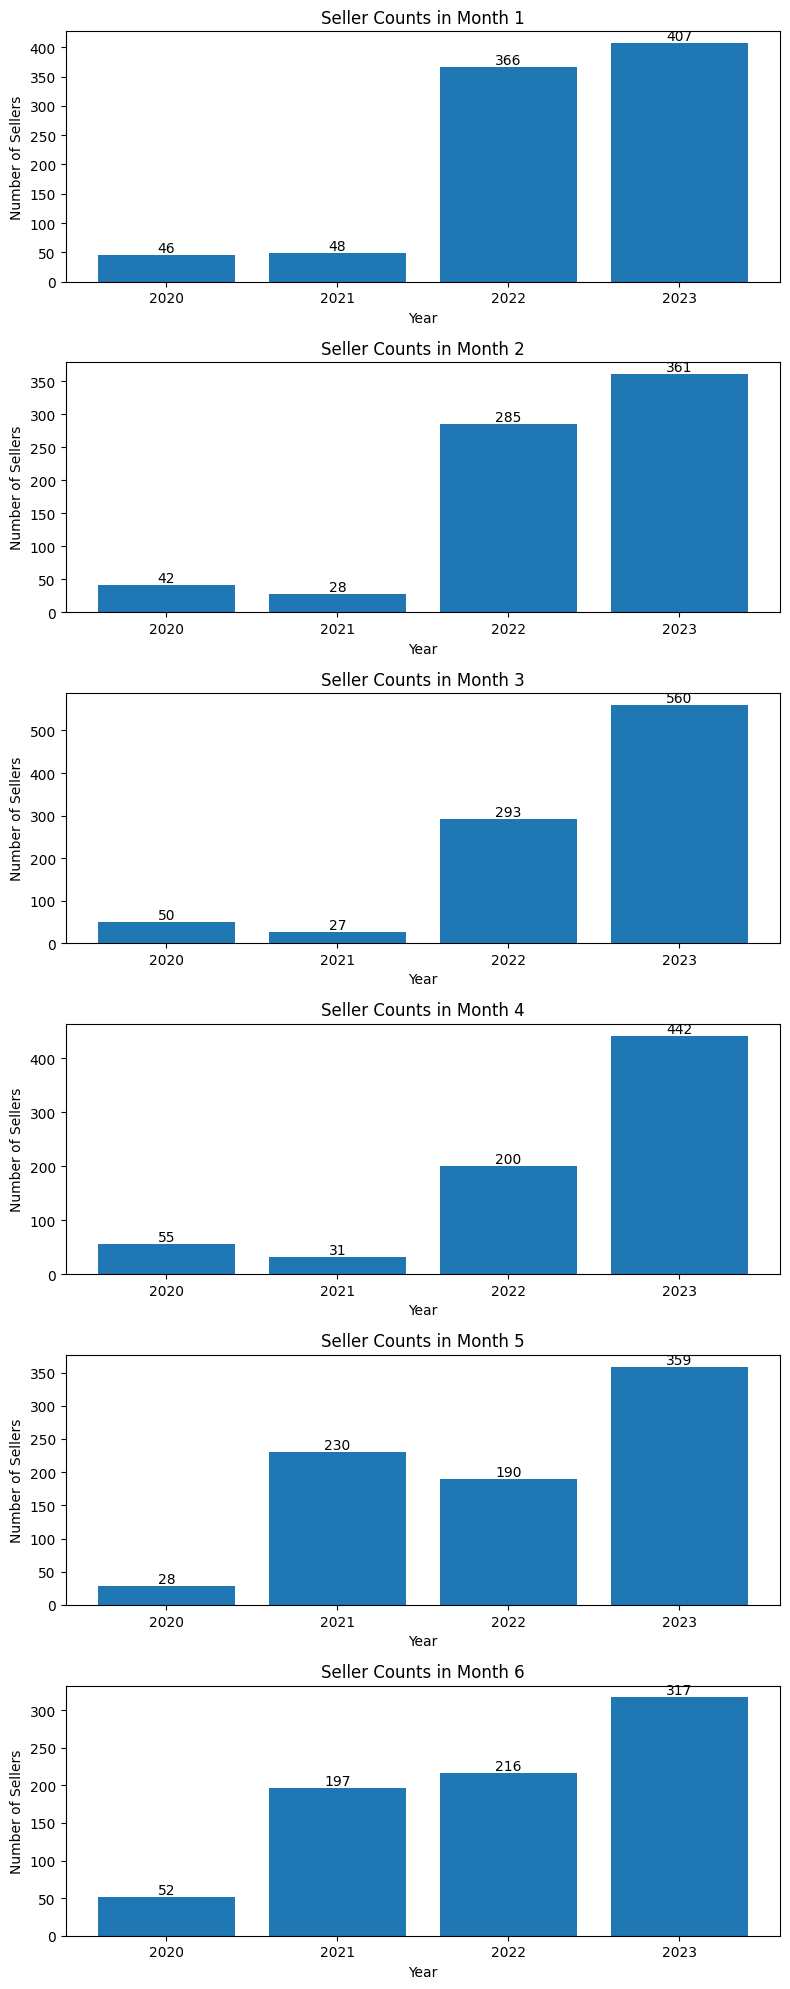

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Yıl ve ay bilgilerini ayrı sütunlara ayırma
df['Year'] = df['Register Date'].dt.year
df['Month'] = df['Register Date'].dt.month

# İstenen yılları ve ayları seçme
selected_years = [2020, 2021, 2022, 2023]
selected_months = list(range(1, 7))  # Ocak'dan Haziran'a kadar
df_selected = df[df['Year'].isin(selected_years) & df['Month'].isin(selected_months)]

# Grafikleri alt alta çizme
fig, axes = plt.subplots(len(selected_months), 1, figsize=(8, 20))

for i, month in enumerate(selected_months):
    ax = axes[i]
    month_data = df_selected[df_selected['Month'] == month]
    monthly_counts = month_data.groupby('Year')['Seller ID'].count()
    
    ax.bar(monthly_counts.index, monthly_counts.values)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Sellers')
    ax.set_title(f'Seller Counts in Month {month}')
    ax.set_xticks(monthly_counts.index)
    
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()


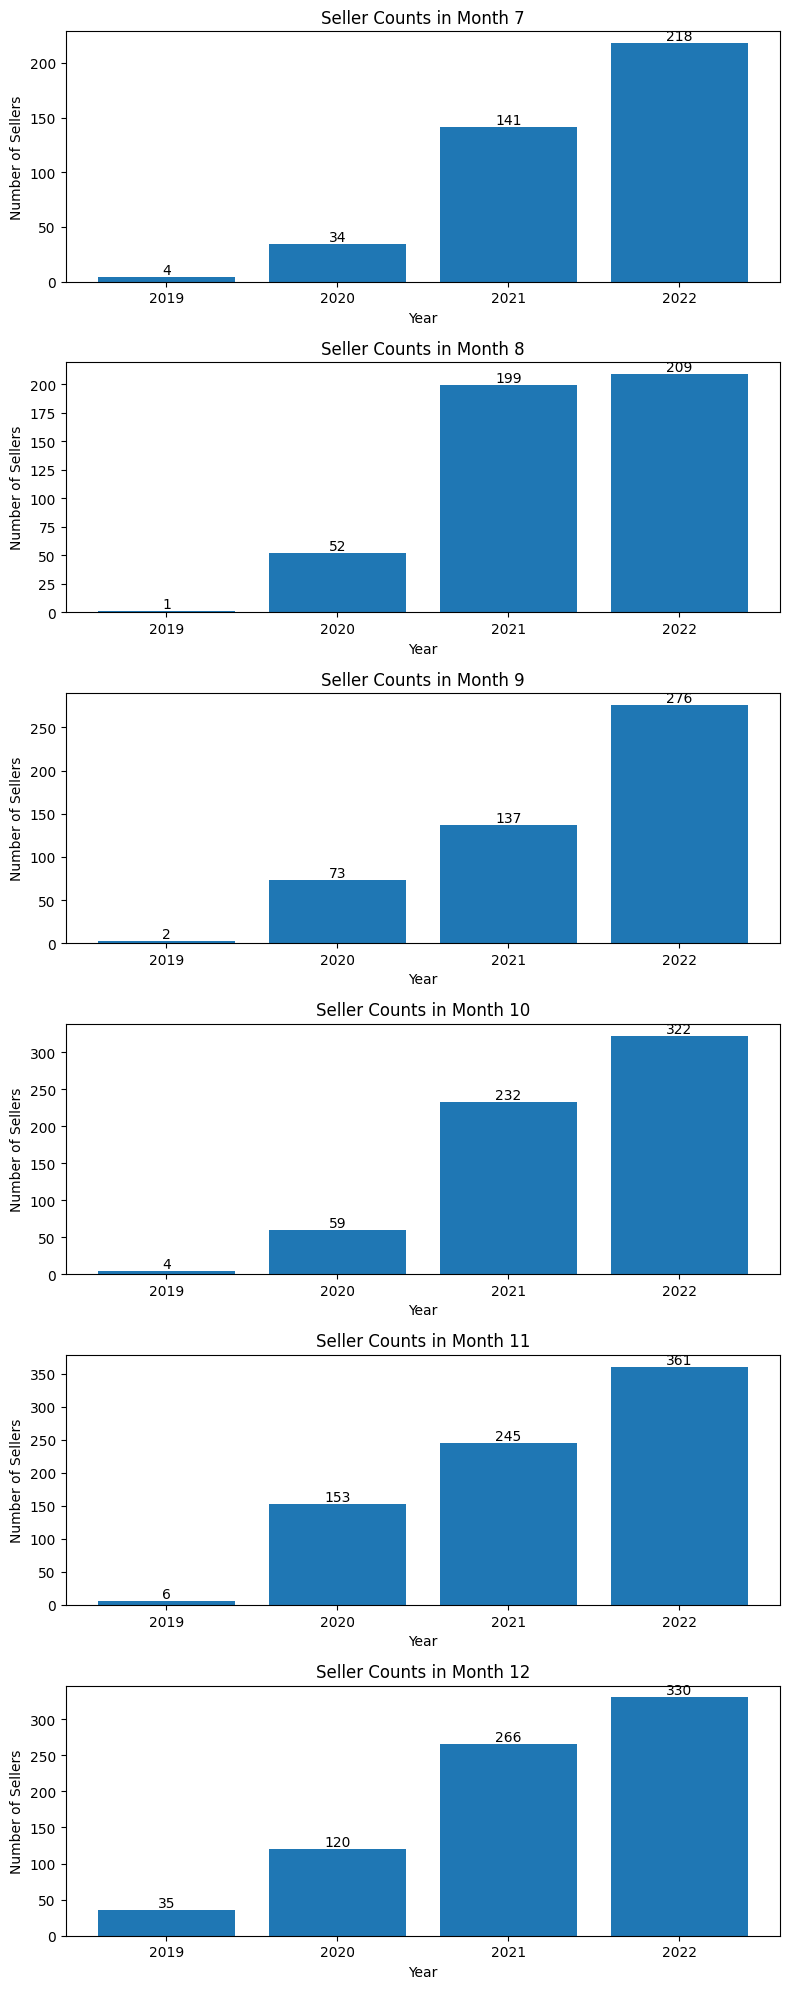

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Yıl ve ay bilgilerini ayrı sütunlara ayırma
df['Year'] = df['Register Date'].dt.year
df['Month'] = df['Register Date'].dt.month

# İstenen yılları ve ayları seçme
selected_years = [2019, 2020, 2021, 2022]
selected_months = list(range(7, 13))  # Temmuz'dan Aralık'a kadar
df_selected = df[df['Year'].isin(selected_years) & df['Month'].isin(selected_months)]

# Grafikleri alt alta çizme
fig, axes = plt.subplots(len(selected_months), 1, figsize=(8, 20))

for i, month in enumerate(selected_months):
    ax = axes[i]
    month_data = df_selected[df_selected['Month'] == month]
    monthly_counts = month_data.groupby('Year')['Seller ID'].count()
    
    ax.bar(monthly_counts.index, monthly_counts.values)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Sellers')
    ax.set_title(f'Seller Counts in Month {month}')
    ax.set_xticks(monthly_counts.index)
    
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%.0f', label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [147]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# Yıl ve ay bilgilerini ayrı sütunlara ayırma
df['Year'] = df['Register Date'].dt.year
df['Month'] = df['Register Date'].dt.month

# Sadece 2019 yılını seçme
df_2019 = df[df['Year'] == 2019]

# Toplam satıcı sayısı (2019)
total_sellers_2019 = df_2019.shape[0]

# Eylül, Ekim ve Kasım aylarındaki satıcı sayısını toplama
total_sellers_before_black_friday = df_2019[(df_2019['Month'] >= 9) & (df_2019['Month'] <= 12)].shape[0]

# Oranı hesaplama
increase_rate = total_sellers_before_black_friday / total_sellers_2019 * 100

# Sonuçları gösterme
print(f"Total Sellers in 2019: {total_sellers_2019}")
print(f"Sellers count in September, October, November, December (2019): {total_sellers_before_black_friday}")
print(f"Ratio (2019): {increase_rate:.2f}%")


Total Sellers in 2019: 52
Sellers count in September, October, November, December (2019): 47
Ratio (2019): 90.38%


In [148]:
import pandas as pd

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])

# Yıl ve ay bilgilerini ayrı sütunlara ayırma
df['Year'] = df['Register Date'].dt.year
df['Month'] = df['Register Date'].dt.month

# Sadece 2020 yılını seçme
df_2020 = df[df['Year'] == 2020]

# Toplam satıcı sayısı (2020)
total_sellers_2020 = df_2020.shape[0]

# Eylül, Ekim ve Kasım aylarındaki satıcı sayısını toplama
total_sellers_before_black_friday = df_2020[(df_2020['Month'] >= 9) & (df_2020['Month'] <= 12)].shape[0]

# Oranı hesaplama
increase_rate = total_sellers_before_black_friday / total_sellers_2020 * 100

# Sonuçları gösterme
print(f"Total Sellers in 2020: {total_sellers_2020}")
print(f"Sellers count in September, October, November, December (2020): {total_sellers_before_black_friday}")
print(f"Ratio (2020): {increase_rate:.2f}%")

Total Sellers in 2020: 764
Sellers count in September, October, November, December (2020): 405
Ratio (2020): 53.01%


In [149]:
# Sadece 2021 yılını seçme
df_2021 = df[df['Year'] == 2021]

# Toplam satıcı sayısı (2021)
total_sellers_2021 = df_2021.shape[0]

# Eylül, Ekim ve Kasım aylarındaki satıcı sayısını toplama
total_sellers_before_black_friday = df_2021[(df_2021['Month'] >= 9) & (df_2021['Month'] <= 12)].shape[0]

# Oranı hesaplama
increase_rate = total_sellers_before_black_friday / total_sellers_2021 * 100

# Sonuçları gösterme
print(f"Total Sellers in 2021: {total_sellers_2021}")
print(f"Sellers count in September, October, November, December (2021): {total_sellers_before_black_friday}")
print(f"Ratio (2021): {increase_rate:.2f}%")

Total Sellers in 2021: 1781
Sellers count in September, October, November, December (2021): 880
Ratio (2021): 49.41%


In [150]:
# Sadece 2022 yılını seçme
df_2022 = df[df['Year'] == 2022]

# Toplam satıcı sayısı (2022)
total_sellers_2022 = df_2022.shape[0]

# Eylül, Ekim ve Kasım aylarındaki satıcı sayısını toplama
total_sellers_before_black_friday = df_2022[(df_2022['Month'] >= 9) & (df_2022['Month'] <= 12)].shape[0]

# Oranı hesaplama
increase_rate = total_sellers_before_black_friday / total_sellers_2022 * 100

# Sonuçları gösterme
print(f"Total Sellers in 2022: {total_sellers_2022}")
print(f"Sellers count in September, October, November, December (2022): {total_sellers_before_black_friday}")
print(f"Ratio (2022): {increase_rate:.2f}%")

Total Sellers in 2022: 3266
Sellers count in September, October, November, December (2022): 1289
Ratio (2022): 39.47%


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Excel dosyasını okuma
file_path = 'All_Users.xlsx'
df = pd.read_excel(file_path)

# Tarih sütunlarını datetime nesnelerine dönüştürme
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

# "Suspended Date" sütunundaki eksik değerleri günün tarihi ile doldur
current_date = pd.Timestamp(datetime.today().date())
df['Suspended Date'].fillna(current_date, inplace=True)

# Aktif kalma süresini hesapla (Suspended Date - Register Date)
df['Active Duration'] = (df['Suspended Date'] - df['Register Date']).dt.days

# Tarih serisini oluşturma ve tarih aralığında kaç satıcı olduğunu hesaplama
date_series = pd.date_range(start=df['Register Date'].min(), end=df['Suspended Date'].max(), freq='D')
seller_counts = []

for date in date_series:
    count = ((df['Register Date'] <= date) & (date <= df['Suspended Date'])).sum()
    seller_counts.append(count)

# Tarih serisi verileri oluşturuluyor
ts_data = pd.Series(seller_counts, index=date_series)

# ARIMA modelinin eğitimi
model = ARIMA(ts_data, order=(5,1,0))
model_fit = model.fit()

# Tahmin yapma
forecast_steps = 5  # 5 aylık tahmin yapacağız
forecast = model_fit.forecast(steps=forecast_steps)

# Tahmin sonuçlarını ve tahmin aylarını yazdırma
forecast_months = ['August', 'September', 'October', 'November', 'December']
for i in range(forecast_steps):
    print(f"2023 yılının {forecast_months[i]} ayında {int(forecast[i])} seller olması beklenmektedir.")


2023 yılının August ayında 1 seller olması beklenmektedir.
2023 yılının September ayında 1 seller olması beklenmektedir.
2023 yılının October ayında 1 seller olması beklenmektedir.
2023 yılının November ayında 1 seller olması beklenmektedir.
2023 yılının December ayında 1 seller olması beklenmektedir.
